# Introduction
- Fold everything for better readability
- On linux Vampire and E should work out of the box

# Imports

In [49]:
import pm4py
import pandas as pd
from Julia import tree_to_tptp
from example_usage import use_provers
from create_thesis_with_2_spec import create_thesis_with_2_spec, LogicFunctions
import os

In [50]:
def print_provers(provers):
    print(provers[0])
    print(f'Vampire: {provers[1]}')
    print(f'Eprover: {provers[2]}')

def provers_to_csv(provers):
    print(','.join(provers))

# Julia's problems

## Problem1

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1517.20it/s]

Seq3(1]register_request, Loop(2]l_s, Seq2(3]And2(4]a2_s, check_ticket, Xor2(5]x2_s, examine_casually, examine_thoroughly, x2_e[5), a2_e[4), decide[3), reinitiate_request[2), Xor2(2]x2_s, reject_request, pay_compensation, x2_e[2)[1)
ini: register_request
fin: x2_e

Wynik: 
ForAll(~((register_request) ^ (x2_s | x2_e)))
ForAll(~((examine_thoroughly) ^ (x2_e)))
ForAll(~(((check_ticket) | (x2_s | x2_e)) ^ (a2_e)))
ForAll((check_ticket) => Exist(a2_e))
ForAll(~((x2_s) ^ (examine_thoroughly)))
ForAll(~((reject_request) ^ (pay_compensation)))
ForAll(~((a2_s | decide) ^ (reinitiate_request)))
Exist(x2_s)
ForAll((x2_s) => ((Exist(reject_request) ^ ~(Exist(pay_compensation))) | (~(Exist(reject_request)) ^ Exist(pay_compensation))))
ForAll(((examine_casually) | (examine_thoroughly)) => Exist(x2_e))
ForAll(~((l_s | decide) ^ (x2_s | x2_e)))
ForAll(~((l_s) ^ (reinitiate_request)))
ForAll(~((pay_compensation) ^ (x2_e)))
ForAll((l_s) => Exist(a2_s | decide))
ForAll((a2_s) => (Exist(check_ticket) ^ Exi


/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/d

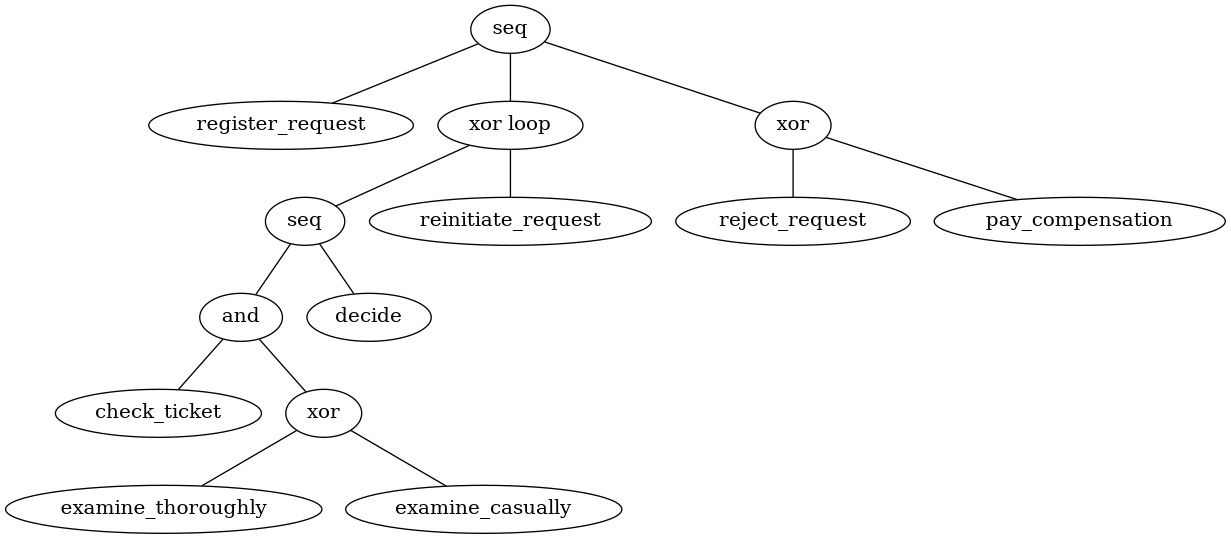

our_problems/problem_1.p
Vampire: % SZS status Satisfiable for problem_1 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [51]:
log = pm4py.read_xes("Data/running-example.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_1.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("our_problems/problem_1.p"))

## Problem2

/tmp/ipykernel_455392/2129067091.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_

Seq5(1]register, analyze_defect, And2(2]a2_s, Xor2(3]x2_s, tau, inform_user, x2_e[3), And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, repair_complex, tau[5), x2_e[4), Xor2(4]x2_s, tau, Loop(5]l_s, Seq2(6]Xor2(7]x2_s, tau, repair_simple, x2_e[7), test_repair[6), restart_repair[5), x2_e[4), a2_e[3), a2_e[2), Xor2(2]x2_s, tau, archive_repair, x2_e[2), end[1)
ini: register
fin: end

Wynik: 
ForAll((x2_s | x2_e) => Exist(test_repair))
ForAll(~((register) ^ (x2_s | x2_e)))
ForAll(~((l_s) ^ (restart_repair)))
ForAll(~((analyze_defect) ^ (a2_s | a2_e)))
ForAll((restart_repair) => Exist(x2_s | test_repair))
ForAll(~((a2_s) ^ ((x2_s | x2_e) | (x2_s | x2_e))))
ForAll(~((x2_s) ^ (repair_simple)))
ForAll((register) => Exist(analyze_defect))
ForAll(~((l_s | repair_complex) ^ (x2_e)))
ForAll(~((l_s) ^ (repair_complex)))
ForAll(~((x2_s) ^ (inform_user)))
ForAll(~((tau) ^ (inform_user)))
Exist(x2_s)
ForAll(~((x2_s) ^ (l_s | repair_complex)))
ForAll(~((register) ^ (end)))
ForAll((x2_s | test_repair) => ((Exi

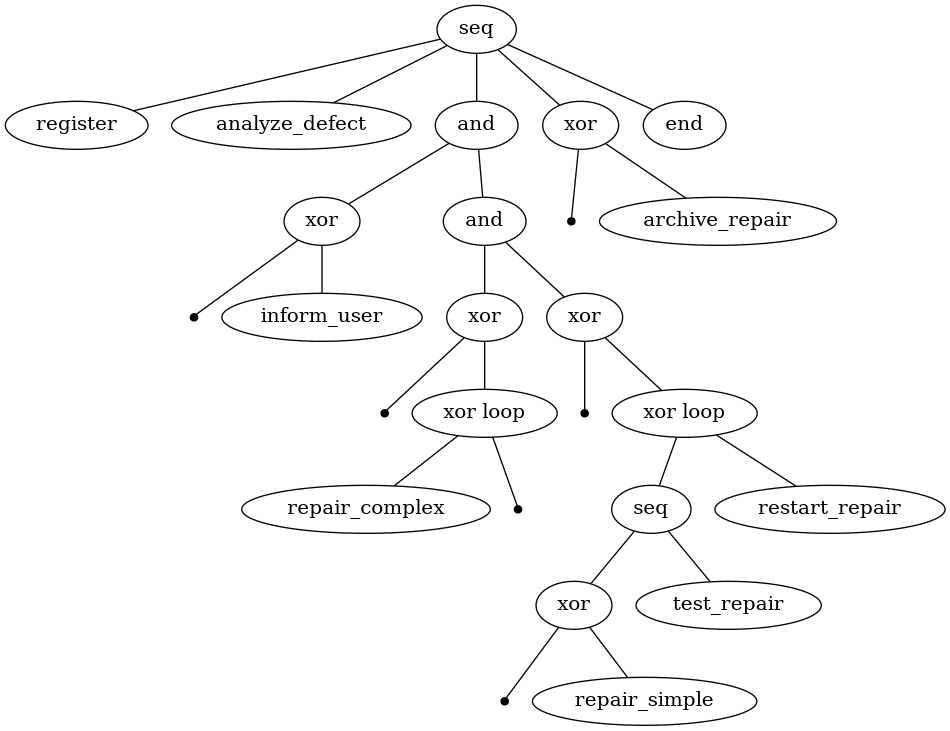

our_problems/problem_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for problem_2
Eprover: # Proof found! # SZS status Unsatisfiable


In [52]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_2.p", rule_prefix="B")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("our_problems/problem_2.p"))

## Problem3

Seq5(1]register, analyze_defect, And2(2]a2_s, Xor2(3]x2_s, tau, inform_user, x2_e[3), Seq2(3]Loop(4]l_s, Xor2(5]x2_s, repair_complex, repair_simple, x2_e[5), restart_repair[4), test_repair[3), a2_e[2), archive_repair, end[1)
ini: register
fin: end

Wynik: 
ForAll(((repair_complex) | (repair_simple)) => Exist(x2_e))
ForAll(~((l_s) ^ (restart_repair)))
ForAll(~((analyze_defect) ^ (a2_s | a2_e)))
ForAll(~((repair_complex) ^ (repair_simple)))
ForAll(~((x2_s) ^ (repair_simple)))
ForAll(~((l_s) ^ (x2_s | x2_e)))
ForAll((register) => Exist(analyze_defect))
ForAll(~((register) ^ (end)))
ForAll(~((x2_s) ^ (inform_user)))
ForAll(~((tau) ^ (inform_user)))
Exist(x2_s)
ForAll((x2_s | x2_e) => ((Exist(restart_repair) ^ Exist(x2_s | x2_e)) | (~(Exist(restart_repair)))))
ForAll(~((x2_s) ^ (tau)))
ForAll((a2_s | a2_e) => Exist(archive_repair))
ForAll(((tau) | (inform_user)) => Exist(x2_e))
ForAll(~((x2_s) ^ (x2_e)))
ForAll(~((x2_s | x2_e) ^ (restart_repair)))
ForAll((analyze_defect) => Exist(a2_s | a2_

/tmp/ipykernel_455392/2707570281.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/si

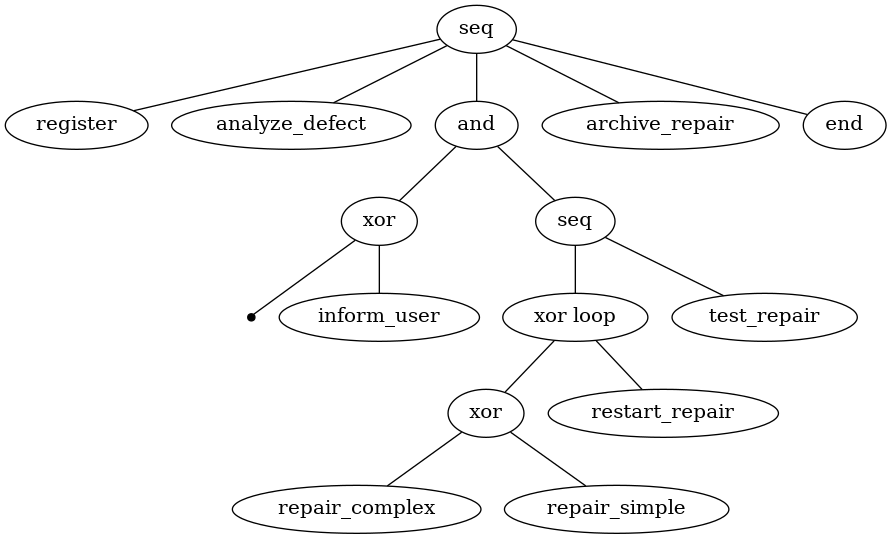

our_problems/problem_3.p
Vampire: % SZS status Satisfiable for problem_3 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [53]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.5, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_3.p", rule_prefix="C")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("our_problems/problem_3.p"))

## Problem4

Seq5(1]register, analyze_defect, And2(2]a2_s, inform_user, Xor3(3]x3_s, repair_complex, Loop(4]l_s, test_repair, tau[4), Loop(4]l_s, repair_simple, tau[4), x3_e[3), a2_e[2), archive_repair, end[1)
ini: register
fin: end

Wynik: 
ForAll((l_s) => Exist(test_repair))
ForAll((x3_s | x3_e) => Exist(a2_e))
ForAll(~((analyze_defect) ^ (a2_s | a2_e)))
ForAll((x3_s) => ((Exist(repair_complex) ^ ~(Exist(l_s | test_repair)) ^ ~(Exist(l_s | repair_simple))) | ((~(Exist(repair_complex)) ^ Exist(l_s | test_repair) ^ ~(Exist(l_s | repair_simple))) | (~(Exist(repair_complex)) ^ ~(Exist(l_s | test_repair)) ^ Exist(l_s | repair_simple)))))
ForAll((register) => Exist(analyze_defect))
ForAll(~((x3_s) ^ (l_s | test_repair)))
ForAll(~((register) ^ (end)))
ForAll(~((l_s | test_repair) ^ (l_s | repair_simple)))
ForAll((test_repair) => ((Exist(tau) ^ Exist(test_repair)) | (~(Exist(tau)))))
ForAll((a2_s | a2_e) => Exist(archive_repair))
ForAll((tau) => Exist(repair_simple))
ForAll(~((x3_s) ^ (l_s | repair_simpl

/tmp/ipykernel_455392/1993079267.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/si

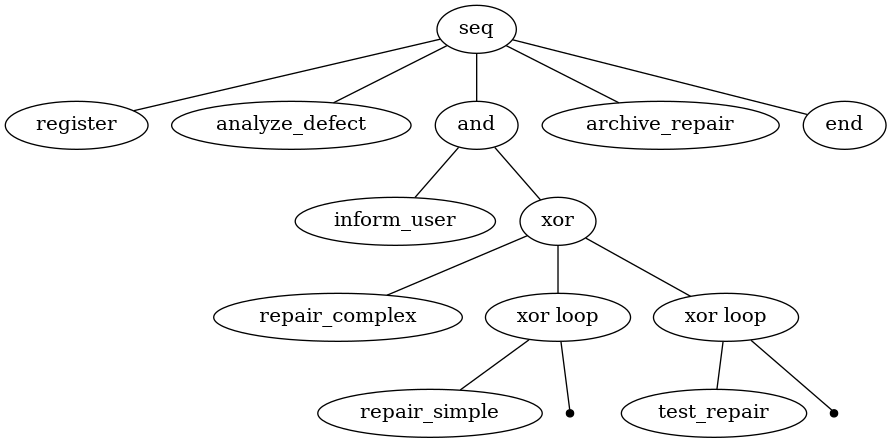

our_problems/problem_4.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for problem_4
Eprover: # Proof found! # SZS status Unsatisfiable


In [54]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 1.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "our_problems/problem_4.p", rule_prefix="D", verbose=True)
pm4py.view_process_tree(process_tree)
print_provers(use_provers("our_problems/problem_4.p"))

## Problem5

In [55]:
create_thesis_with_2_spec('our_problems/problem_2.p', 
                          'our_problems/problem_3.p', 'our_problems/problem_5.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_5.p", verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Theorem for problem_5
% SZS output start Proof for problem_5
1. ! [X0] : ((x2_e(X0) | x2_s(X0)) => ? [X1] : test_repair(X1)) [input]
13. ? [X1] : x2_s(X1) [input]
63. ! [X1] : ~(a2_e(X1) & (a2_e(X1) | a2_s(X1) | x2_e(X1) | x2_s(X1))) [input]
90. ! [X0] : ((test_repair(X0) | l_s(X0)) => ? [X1] : a2_e(X1)) [input]
128. ? [X0] : x2_s(X0) [rectify 13]
166. ! [X0] : ~(a2_e(X0) & (a2_e(X0) | a2_s(X0) | x2_e(X0) | x2_s(X0))) [rectify 63]
279. ! [X0] : (? [X1] : test_repair(X1) | (~x2_e(X0) & ~x2_s(X0))) [ennf transformation 1]
341. ! [X0] : (~a2_e(X0) | (~a2_e(X0) & ~a2_s(X0) & ~x2_e(X0) & ~x2_s(X0))) [ennf transformation 166]
370. ! [X0] : (? [X1] : a2_e(X1) | (~test_repair(X0) & ~l_s(X0))) [ennf transformation 90]
395. ? [X1] : test_repair(X1) => test_repair(sK0) [choice axiom]
396. ! [X0] : (test_repair(sK0) | (~x2_e(X0) & ~x2_s(X0))) [skolemisation 279,395]
401. ? [X0] : x2_s(X0) => 

Output:
# Initializing proof state
# Scanning for AC axioms
#
#cnf(i_0_18, plain, (x2_s(esk5_0))).
#
#cnf(i_0_146, plain, (x2_s(esk53_0))).
#
#cnf(i_0_47, plain, (register(esk17_0))).
#
#cnf(i_0_73, plain, (~a2_s(X1))).
#
#cnf(i_0_164, plain, (register(esk62_0))).
#
#cnf(i_0_52, plain, (l_s(esk18_0))).
#
#cnf(i_0_165, plain, (l_s(esk63_0))).
#
#cnf(i_0_112, plain, (~a2_e(X1))).
#
# Proof found!
# SZS status ContradictoryAxioms

Errors:

our_problems/problem_5.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_5
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem6

In [56]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_6.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_6.p", verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Theorem for problem_6
% SZS output start Proof for problem_6
23. ? [X1] : l_s(X1) [input]
55. ! [X1] : ~((repair_simple(X1) | l_s(X1)) & (test_repair(X1) | l_s(X1))) [input]
112. ? [X0] : l_s(X0) [rectify 23]
136. ! [X0] : ~((repair_simple(X0) | l_s(X0)) & (test_repair(X0) | l_s(X0))) [rectify 55]
269. ! [X0] : ((~repair_simple(X0) & ~l_s(X0)) | (~test_repair(X0) & ~l_s(X0))) [ennf transformation 136]
328. ? [X0] : l_s(X0) => l_s(sK12) [choice axiom]
329. l_s(sK12) [skolemisation 112,328]
434. l_s(sK12) [cnf transformation 329]
500. ~l_s(X0) | ~l_s(X0) [cnf transformation 269]
562. ~l_s(X0) [duplicate literal removal 500]
653. 23 <=> ! [X0] : ~l_s(X0) [avatar definition]
654. ~l_s(X0) <- (23) [avatar component clause 653]
808. 23 [avatar split clause 562,653]
930. $false <- (23) [resolution 654,434]
933. ~23 [avatar contradiction clause 930]
934. $false [avatar sat refutation 808,

## Problem7

In [57]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_7.p', LogicFunctions.IMPLIES)
print_provers(use_provers("our_problems/problem_7.p"))

our_problems/problem_7.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_7
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem8

In [58]:
create_thesis_with_2_spec('our_problems/problem_2.p',
                          'our_problems/problem_3.p', 'our_problems/problem_8.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_8.p"))

our_problems/problem_8.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_8
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem9

In [59]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_9.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_9.p"))

our_problems/problem_9.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_9
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem10

In [60]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_10.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("our_problems/problem_10.p"))

our_problems/problem_10.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_10
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Thesis

In [61]:
thesis5 = '''
fof(thesis, conjecture, (
    ! [X]: (register_request(X) => ?[Y]: (reject_request(Y) | pay_compensation(Y)))
)).
'''
thesis6 = '''
fof(thesis, conjecture, (
    ! [X]: (~(reject_request(X) & pay_compensation(X)))
)).
'''
thesis7 = '''
fof(thesis, conjecture, (
    ! [X]: (register(X) => ?[Y]: (repair_simple(Y) | repair_complex(Y)))
)).
'''
thesis8 = '''
fof(thesis, conjecture, (
    ! [X]: (~(inform_user(X) & tau(X)))
)).
'''

## Problem11

In [62]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis5
with open('our_problems/problem_11.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_11.p"))

our_problems/problem_11.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_11
Eprover: # Proof found! # SZS status Theorem


## Problem12

In [63]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis6
with open('our_problems/problem_12.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_12.p"))

our_problems/problem_12.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_12
Eprover: # Proof found! # SZS status Theorem


## Problem13

In [64]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_13.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_13.p"))

our_problems/problem_13.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_13
Eprover: # Proof found! # SZS status Theorem


## Problem14

In [65]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_14.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_14.p"))

our_problems/problem_14.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_14
Eprover: # Proof found! # SZS status Theorem


## Problem15

In [66]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_15.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_15.p"))

our_problems/problem_15.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_15
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Problem16

In [67]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_16.p', 'w') as f:
    f.write(text)

print_provers(use_provers("our_problems/problem_16.p"))

our_problems/problem_16.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for problem_16
Eprover: # Proof found! # SZS status ContradictoryAxioms


# Big problems

## Hospital Billing

parsing log, completed traces :: 100%|██████████| 100000/100000 [00:14<00:00, 6828.74it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=T

Seq2(1]Loop(2]l_s, new, tau[2), Xor2(2]x2_s, tau, And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, delete, tau[5), x2_e[4), Xor2(4]x2_s, tau, Seq2(5]And2(6]a2_s, Xor2(7]x2_s, tau, Loop(8]l_s, billed, tau[8), x2_e[7), Xor2(7]x2_s, tau, Seq2(8]Loop(9]l_s, Xor3(10]x3_s, Seq2(11]Xor2(12]x2_s, tau, Xor2(13]x2_s, set_status, join_pat, x2_e[13), x2_e[12), Xor2(12]x2_s, tau, And2(13]a2_s, Xor2(14]x2_s, tau, Loop(15]l_s, code_error, tau[15), x2_e[14), Seq3(14]Xor2(15]x2_s, tau, Loop(16]l_s, release, tau[16), x2_e[15), Xor2(15]x2_s, tau, Xor2(16]x2_s, code_ok, manual, x2_e[16), x2_e[15), Xor2(15]x2_s, tau, And2(16]a2_s, Xor2(17]x2_s, tau, Loop(18]l_s, code_nok, tau[18), x2_e[17), Xor2(17]x2_s, tau, Seq2(18]Xor2(19]x2_s, tau, And2(20]a2_s, Xor2(21]x2_s, tau, Loop(22]l_s, storno, tau[22), x2_e[21), Xor2(21]x2_s, tau, Loop(22]l_s, reject, tau[22), x2_e[21), a2_e[20), x2_e[19), Xor2(19]x2_s, tau, And2(20]a2_s, Xor2(21]x2_s, tau, Loop(22]l_s, reopen, tau[22), x2_e[21), Xor2(21]x2_s, tau, fin, x2_e[21), a2_

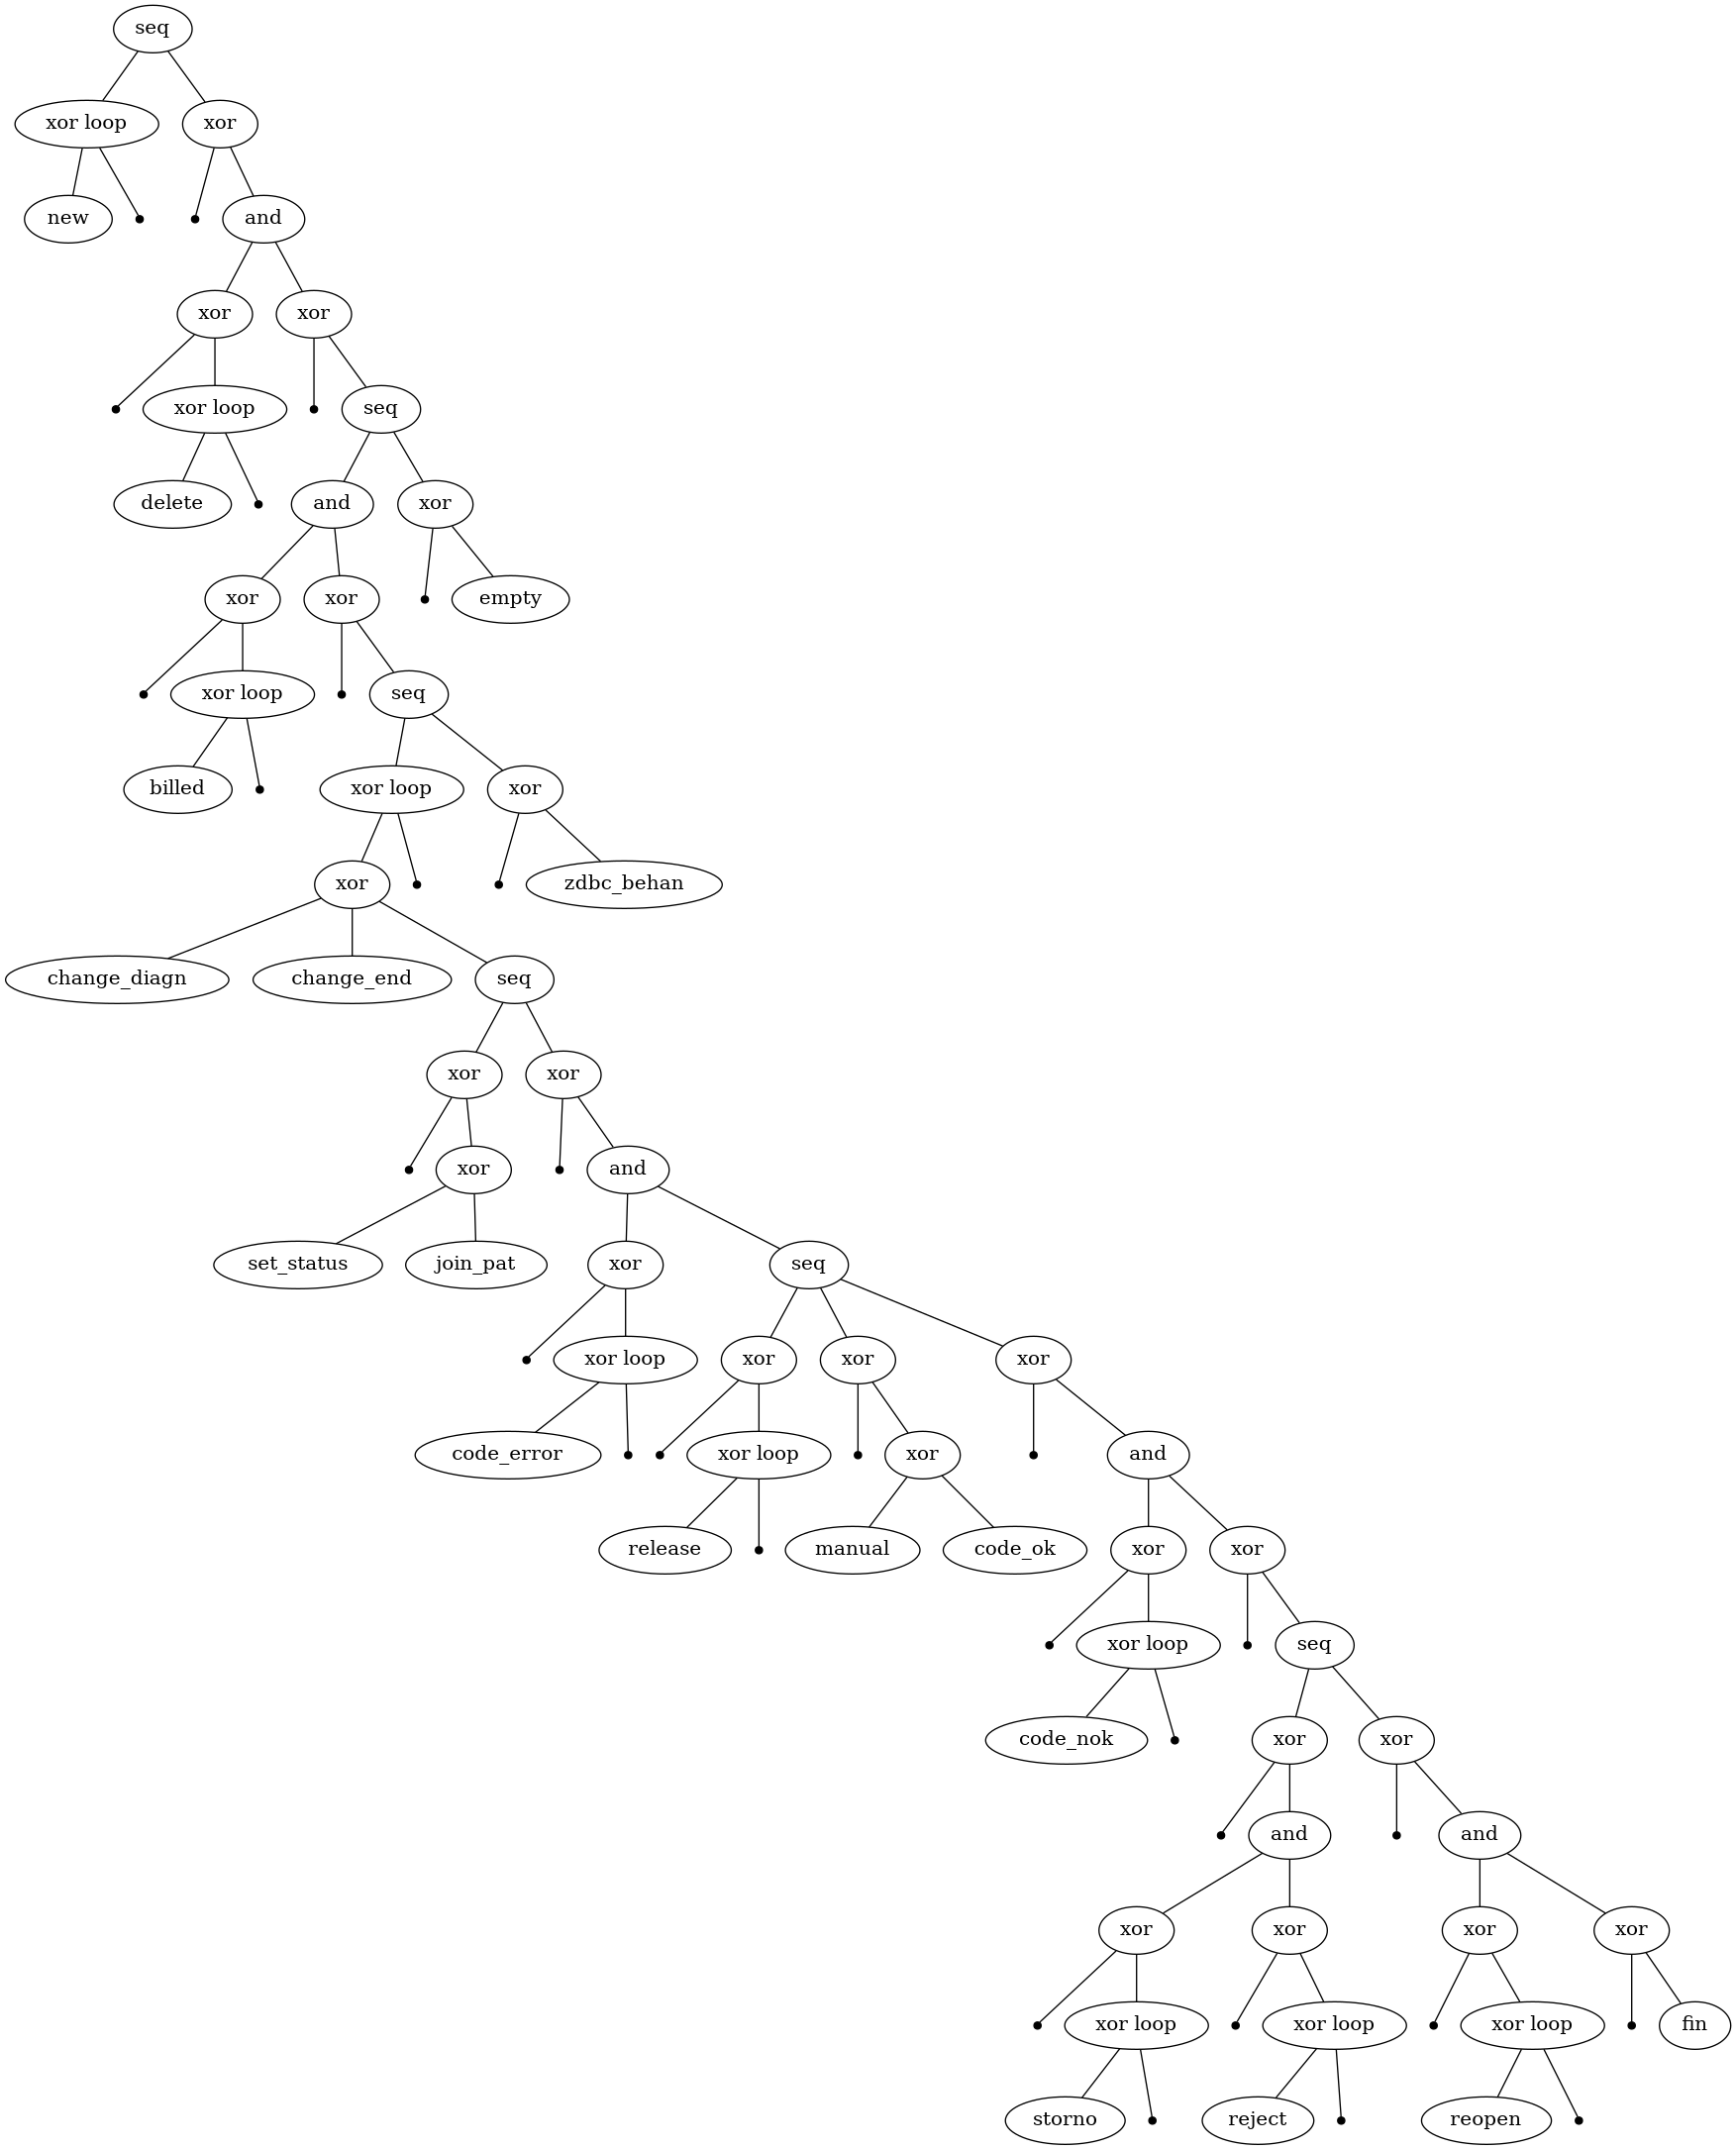

big/hb_0.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for hb_0
Eprover: # Proof found! # SZS status Unsatisfiable


In [68]:
log = pm4py.read_xes("Data/Hospital Billing - Event Log.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/hb_0.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/hb_0.p"))

Seq2(1]Loop(2]l_s, new, tau[2), Xor2(2]x2_s, Seq2(3]Seq2(4]And2(5]a2_s, Loop(6]l_s, billed, tau[6), Seq2(6]Xor2(7]x2_s, Loop(8]l_s, set_status, tau[8), Seq3(8]Xor2(9]x2_s, Seq2(10]Xor2(11]x2_s, tau, Xor3(12]x3_s, Seq2(13]Seq2(14]Xor2(15]x2_s, tau, Loop(16]l_s, code_error, tau[16), x2_e[15), And2(15]a2_s, Loop(16]l_s, storno, tau[16), And2(16]a2_s, Loop(17]l_s, code_nok, tau[17), Loop(17]l_s, reject, tau[17), a2_e[16), a2_e[15)[14), Xor2(14]x2_s, tau, Loop(15]l_s, reopen, tau[15), x2_e[14)[13), Loop(13]l_s, change_end, tau[13), Loop(13]l_s, change_diagn, tau[13), x3_e[12), x2_e[11), Loop(11]l_s, fin, tau[11)[10), Loop(10]l_s, manual, tau[10), x2_e[9), Loop(9]l_s, release, tau[9), Loop(9]l_s, code_ok, tau[9)[8), x2_e[7), Xor2(7]x2_s, tau, zdbc_behan, x2_e[7)[6), a2_e[5), Xor2(5]x2_s, tau, empty, x2_e[5)[4), Xor2(4]x2_s, tau, Loop(5]l_s, delete, tau[5), x2_e[4)[3), Loop(3]l_s, join_pat, tau[3), x2_e[2)[1)
ini: l_s
fin: x2_e

Wynik: 
ForAll(~((empty) ^ (x2_e)))
ForAll(~((reopen) ^ (tau)))


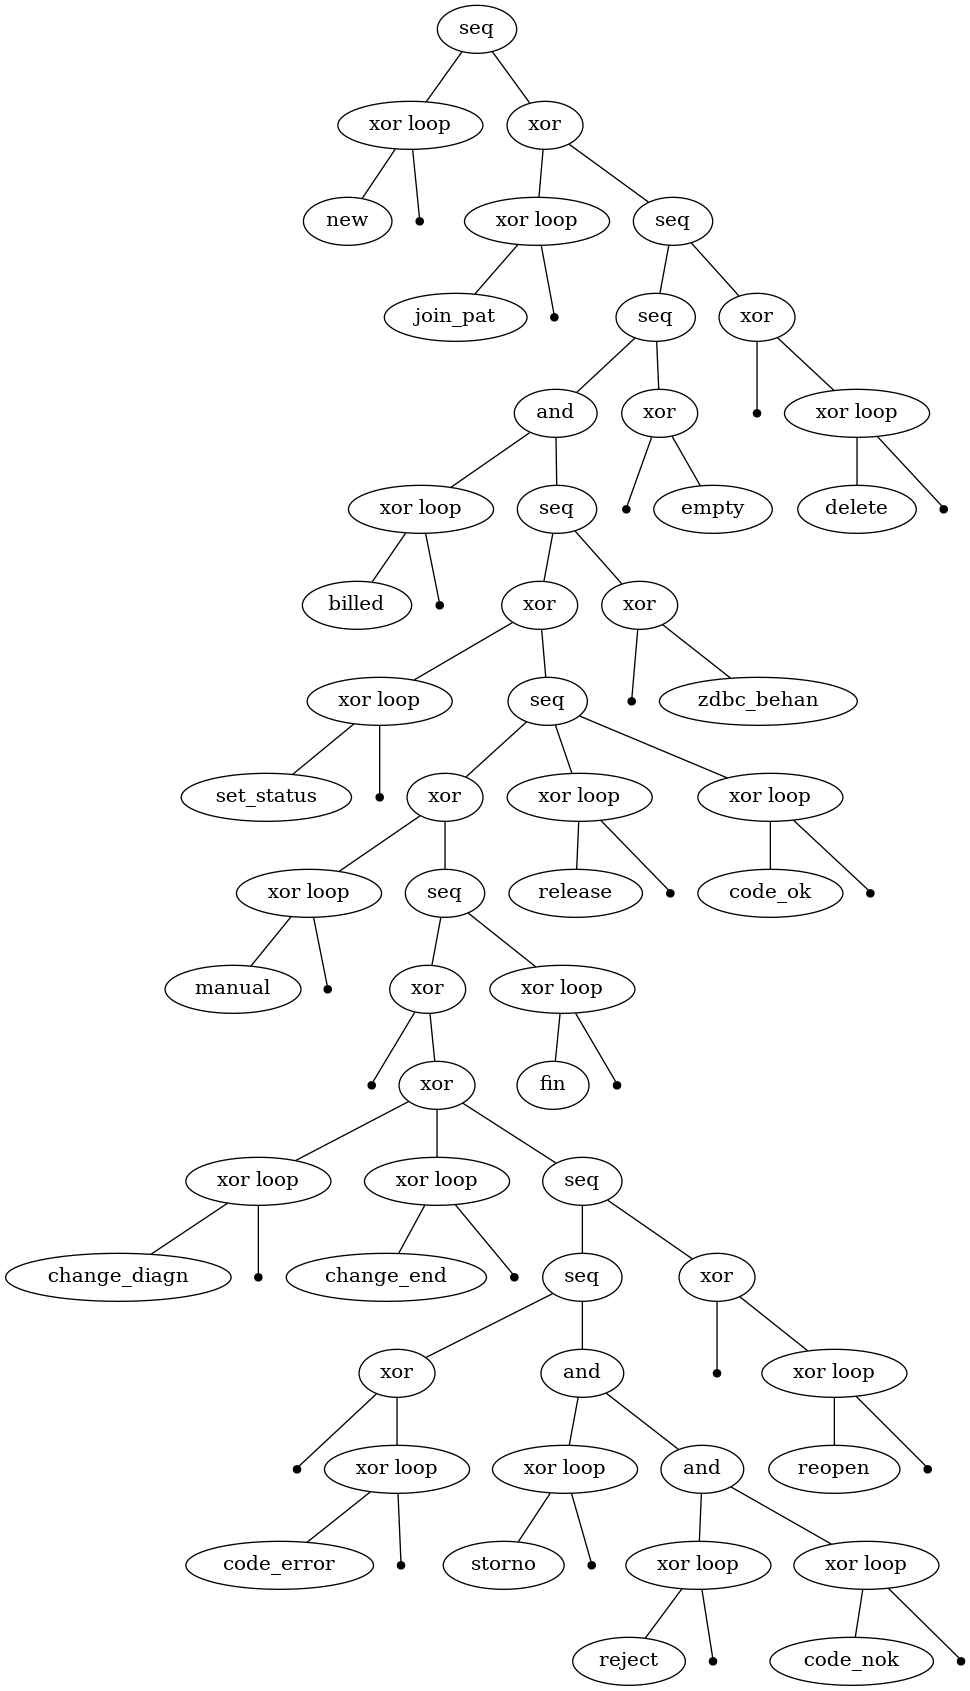

big/hb_25.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for hb_25
Eprover: # Proof found! # SZS status Unsatisfiable


In [69]:
process_tree = pm4py.discover_process_tree_inductive(
    log, 0.25, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/hb_25.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/hb_25.p"))

In [70]:
create_thesis_with_2_spec('big/hb_0.p', 'big/hb_25.p',
                          'big/hb_1.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("big/hb_1.p"))

big/hb_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [71]:
create_thesis_with_2_spec('big/hb_0.p', 'big/hb_25.p',
                          'big/hb_2.p', LogicFunctions.IMPLIES)
print_provers(use_provers("big/hb_2.p"))

big/hb_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_2
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [72]:
with open('big/hb_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ?[X]: new(X) => ?[Y]: join_pat(Y)
)).
'''
with open('big/hb_25_1.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/hb_25_1.p"))

big/hb_25_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_25_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [73]:
with open('big/hb_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: new(X) => ?[Y]: join_pat(Y)
)).
'''
with open('big/hb_25_2.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/hb_25_2.p"))

big/hb_25_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_25_2
Eprover: # Proof found! # SZS status ContradictoryAxioms


## BPIC2012

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:05<00:00, 2300.46it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=Tru

Seq3(1]a_submitted, a_partlysubmitted, Loop(2]l_s, Seq2(3]Xor2(4]x2_s, tau, Xor3(5]x3_s, w_beoordelen_fraude, w_afhandelen_leads, a_preaccepted, x3_e[5), x2_e[4), Xor2(4]x2_s, tau, And2(5]a2_s, Xor2(6]x2_s, tau, Loop(7]l_s, w_completeren_aanvraag, tau[7), x2_e[6), Xor2(6]x2_s, tau, Seq2(7]Xor2(8]x2_s, tau, a_accepted, x2_e[8), Xor2(8]x2_s, tau, And2(9]a2_s, Xor2(10]x2_s, tau, Loop(11]l_s, o_selected, tau[11), x2_e[10), Seq2(10]Xor2(11]x2_s, tau, a_finalized, x2_e[11), Loop(11]l_s, Seq2(12]Xor2(13]x2_s, tau, Xor2(14]x2_s, Seq2(15]o_created, o_sent[15), a_cancelled, x2_e[14), x2_e[13), Xor2(13]x2_s, tau, Seq2(14]And2(15]a2_s, Xor2(16]x2_s, tau, Loop(17]l_s, w_nabellen_incomplete_dossiers, tau[17), x2_e[16), Xor2(16]x2_s, tau, Seq2(17]Xor2(18]x2_s, tau, And2(19]a2_s, Xor2(20]x2_s, tau, Loop(21]l_s, w_valideren_aanvraag, tau[21), x2_e[20), Xor2(20]x2_s, tau, Xor2(21]x2_s, And4(22]a4_s, a_registered, Xor2(23]x2_s, tau, o_accepted, x2_e[23), a_approved, a_activated, a4_e[22), Seq2(22]Xor2(23

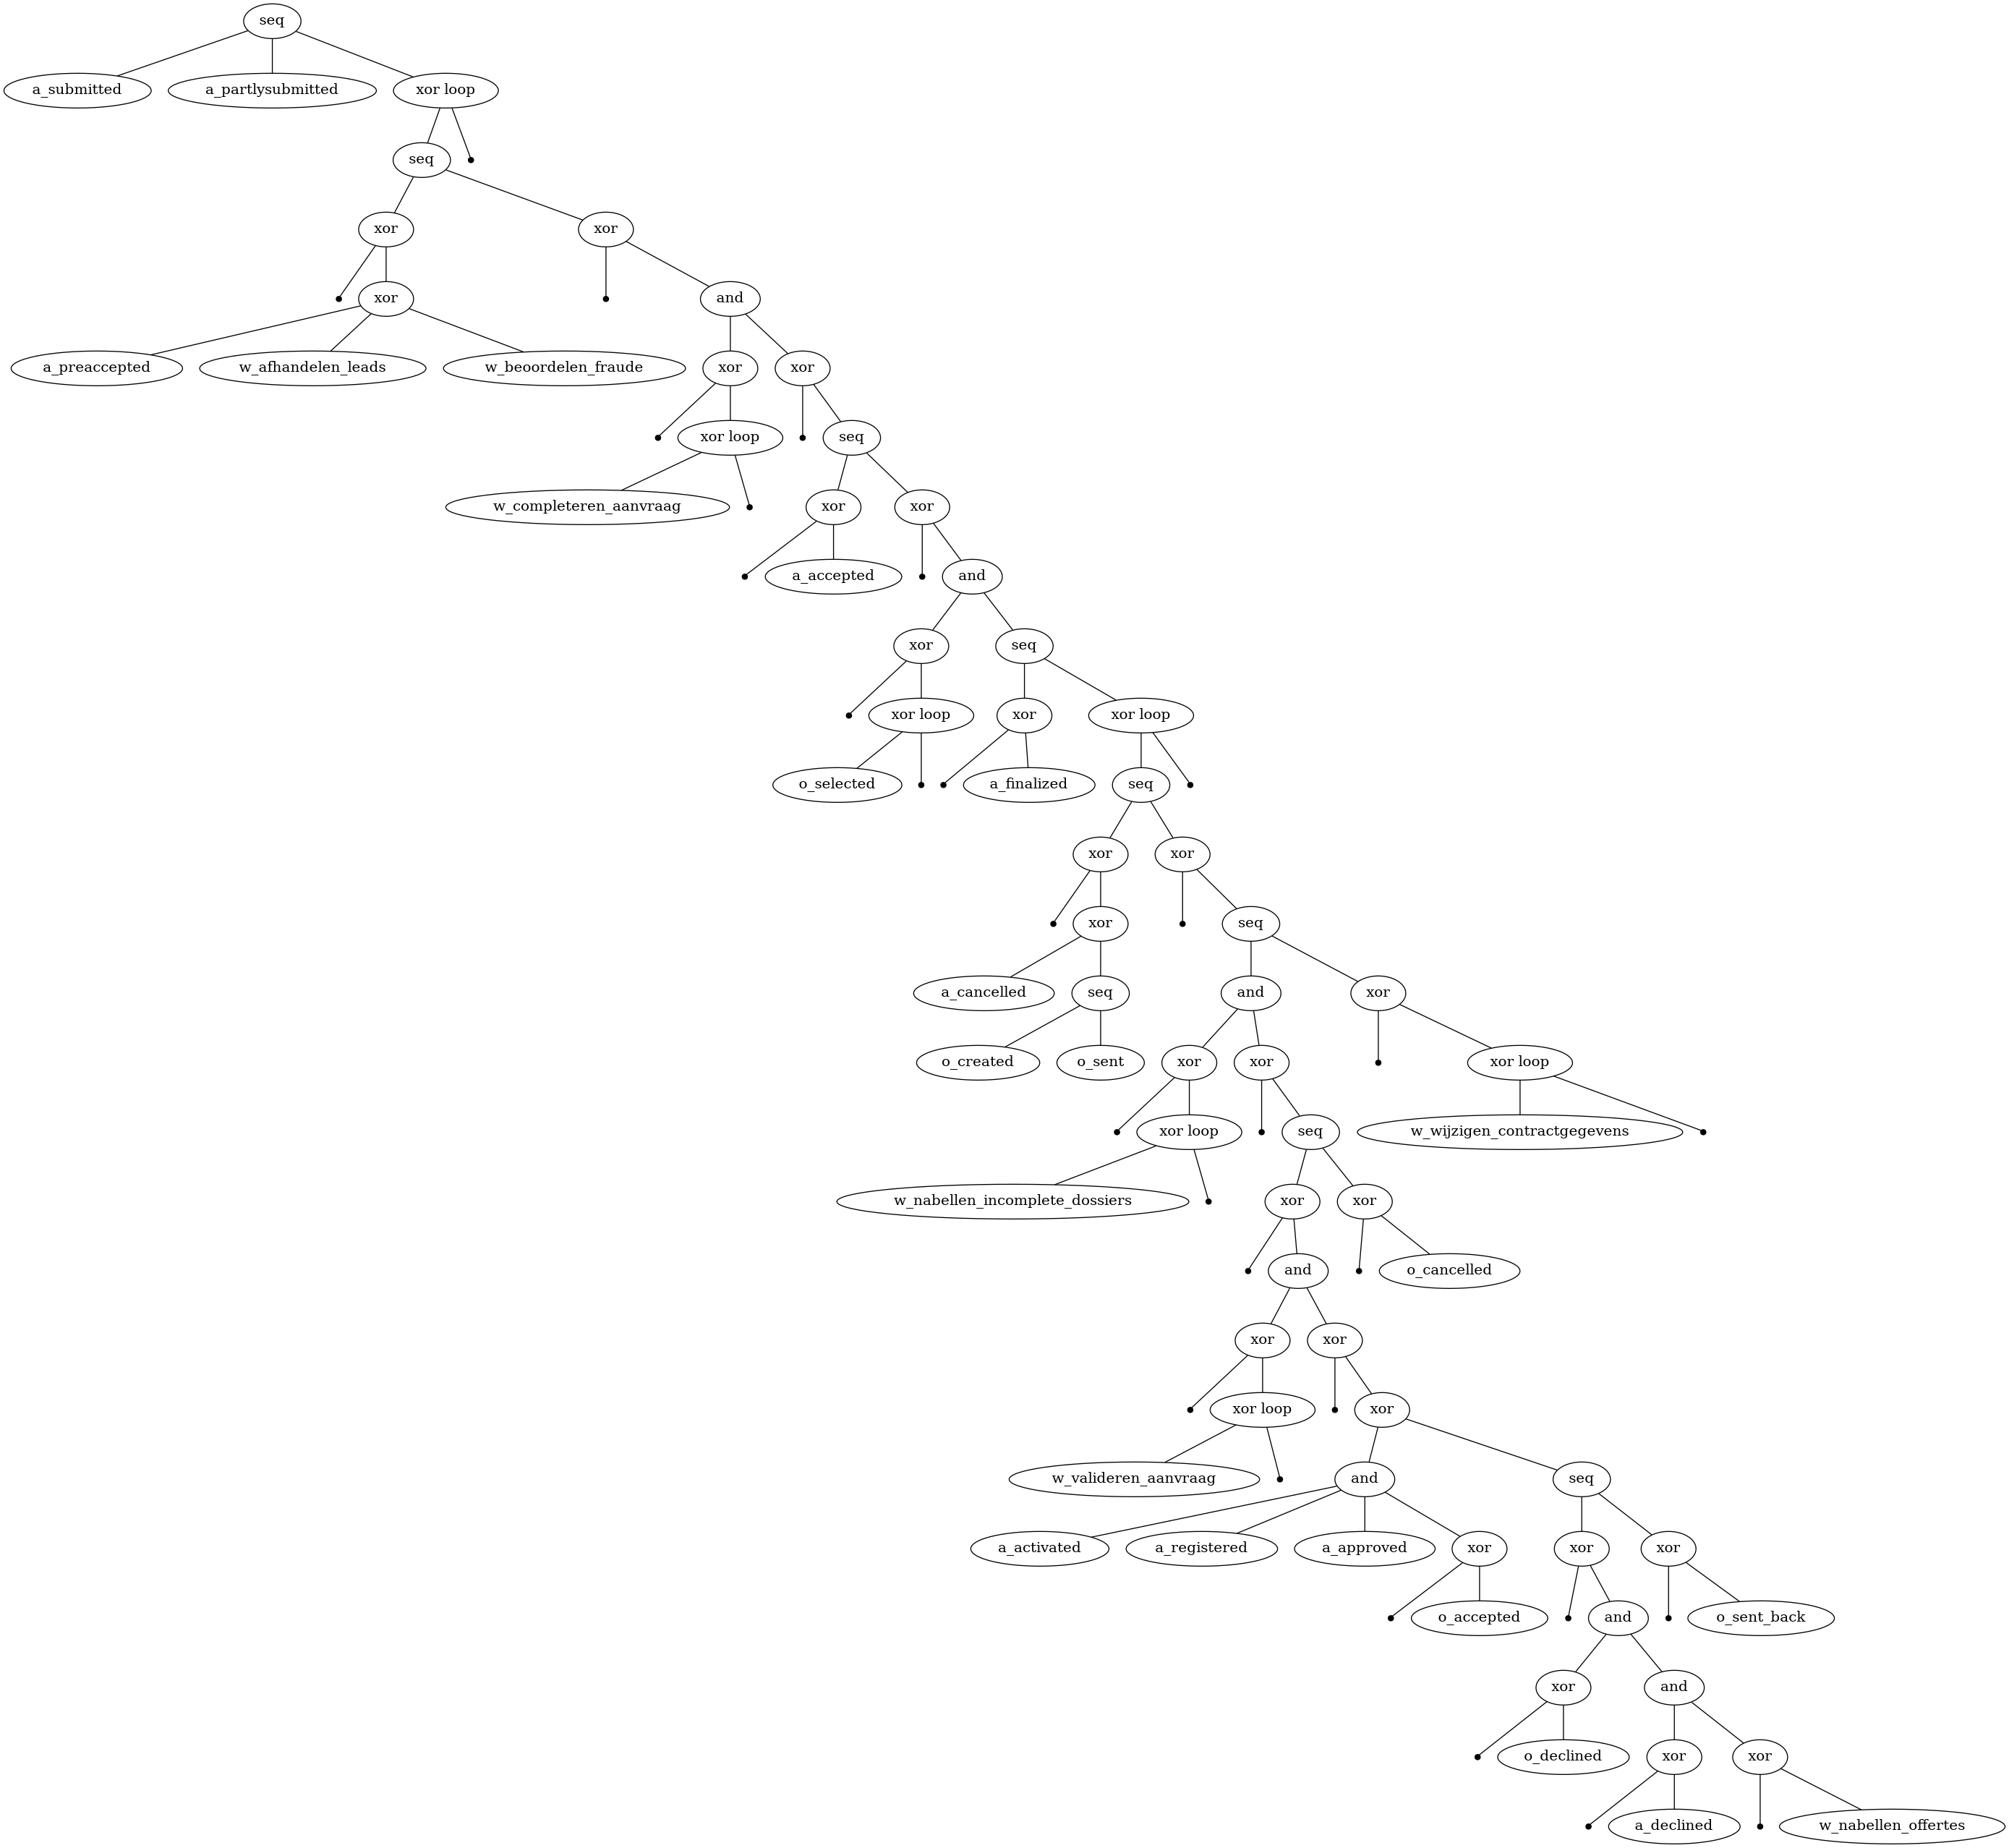

big/bp_0.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for bp_0
Eprover: # Proof found! # SZS status Unsatisfiable


In [74]:
log = pm4py.read_xes("Data/bpic2012.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/bp_0.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/bp_0.p"))

Seq3(1]a_submitted, a_partlysubmitted, Loop(2]l_s, Seq2(3]Xor3(4]x3_s, w_beoordelen_fraude, w_afhandelen_leads, a_preaccepted, x3_e[4), Xor2(4]x2_s, tau, And2(5]a2_s, Xor2(6]x2_s, tau, Loop(7]l_s, w_completeren_aanvraag, tau[7), x2_e[6), Seq2(6]Xor2(7]x2_s, tau, a_accepted, x2_e[7), And2(7]a2_s, Xor2(8]x2_s, tau, Loop(9]l_s, o_selected, tau[9), x2_e[8), Seq2(8]Xor2(9]x2_s, tau, a_finalized, x2_e[9), Loop(9]l_s, Seq2(10]Xor2(11]x2_s, tau, Xor2(12]x2_s, Seq2(13]o_created, o_sent[13), a_cancelled, x2_e[12), x2_e[11), Seq2(11]Xor3(12]x3_s, Loop(13]l_s, Xor3(14]x3_s, Seq2(15]Xor2(16]x2_s, tau, o_sent_back, x2_e[16), Xor2(16]x2_s, And4(17]a4_s, Xor2(18]x2_s, tau, o_accepted, x2_e[18), Xor2(18]x2_s, tau, a_approved, x2_e[18), Xor2(18]x2_s, tau, a_activated, x2_e[18), And2(18]a2_s, Xor2(19]x2_s, tau, a_registered, x2_e[19), Xor2(19]x2_s, tau, Loop(20]l_s, w_valideren_aanvraag, tau[20), x2_e[19), a2_e[18), a4_e[17), w_nabellen_incomplete_dossiers, x2_e[16)[15), o_declined, a_declined, x3_e[14),

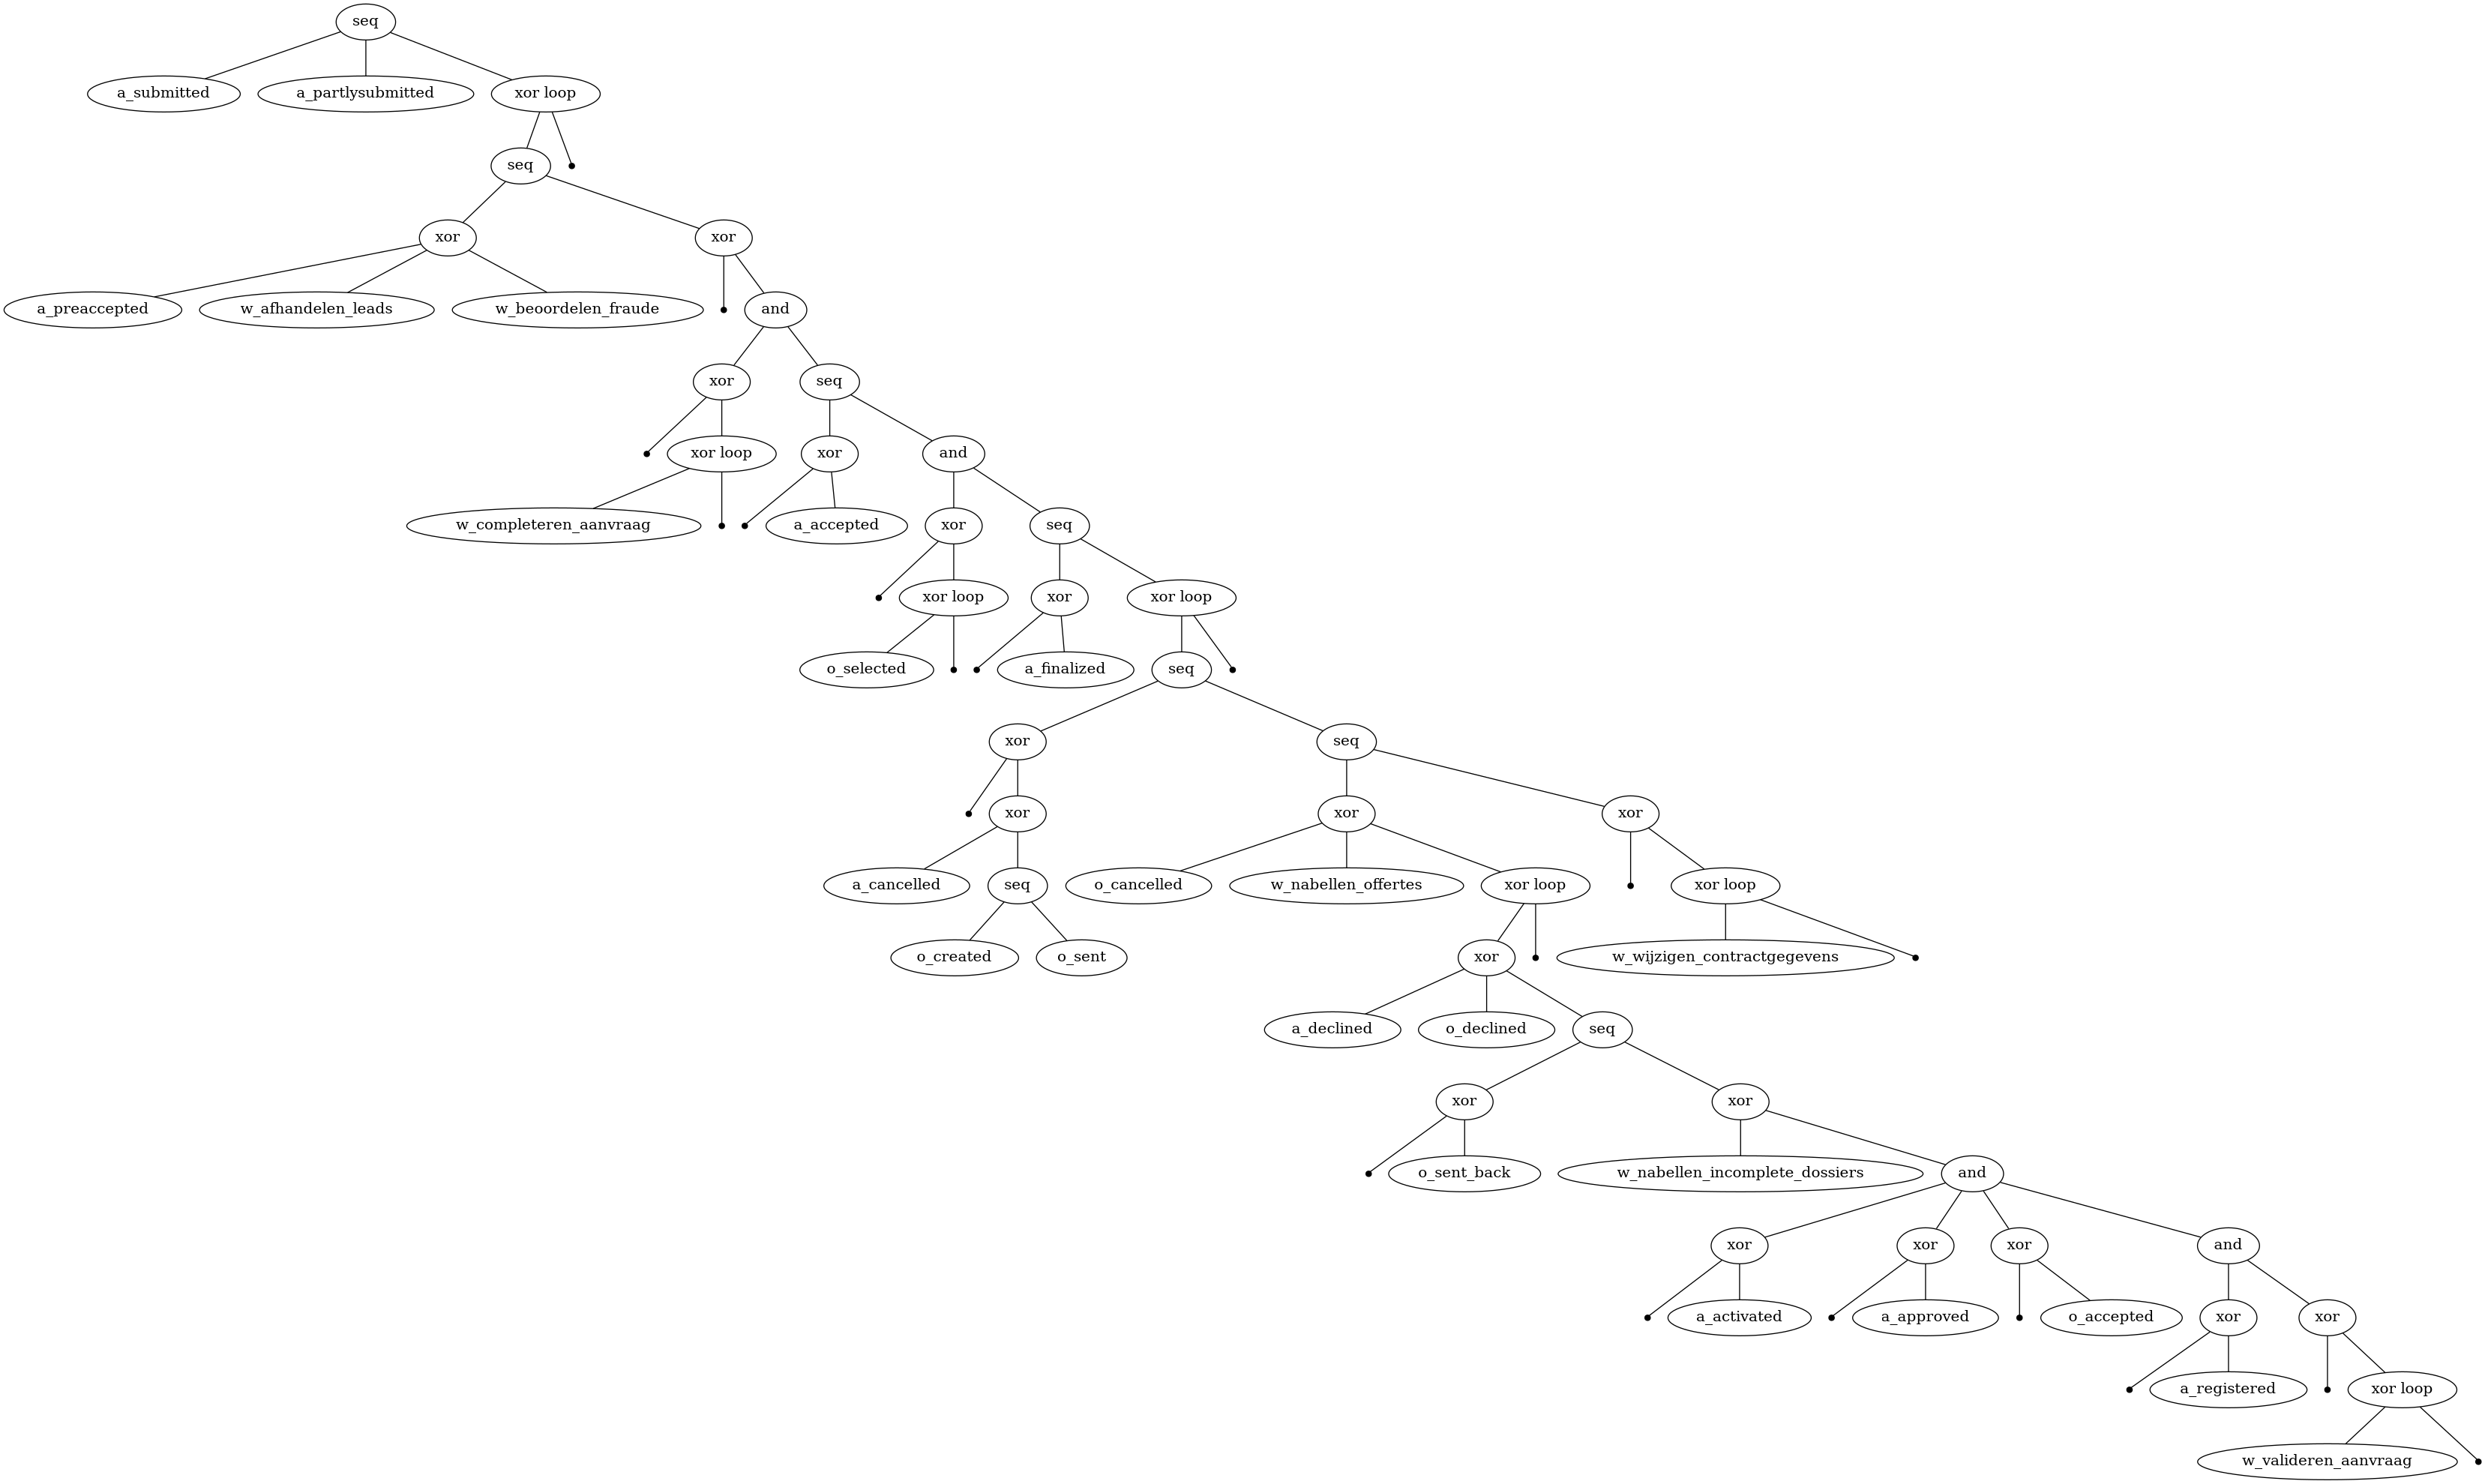

big/bp_25.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for bp_25
Eprover: # Proof found! # SZS status Unsatisfiable


In [75]:
process_tree = pm4py.discover_process_tree_inductive(
    log, 0.25, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/bp_25.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/bp_25.p"))

In [76]:
create_thesis_with_2_spec('big/bp_0.p', 'big/bp_25.p', 
                          'big/bp_im.p', LogicFunctions.IMPLIES)
print_provers(use_provers("big/bp_im.p"))

big/bp_im.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for bp_im
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [77]:
create_thesis_with_2_spec('big/bp_0.p', 'big/bp_25.p',
                          'big/bp_eq.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("big/bp_eq.p"))

big/bp_eq.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for bp_eq
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [78]:
with open('big/bp_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: ~(w_afhandelen_leads(X) & a_preaccepted(X))
)).
'''
with open('big/bp_25_1.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/bp_25_1.p"))

big/bp_25_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for bp_25_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [79]:
with open('big/bp_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: ~(a_submitted(X) => a_partlysubmitted(X))
)).
'''
with open('big/bp_25_2.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/bp_25_2.p"))

big/bp_25_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for bp_25_2
Eprover: # Proof found! # SZS status ContradictoryAxioms


## log_3_1732138120

parsing log, completed traces :: 100%|██████████| 30369/30369 [00:11<00:00, 2607.06it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)


Seq3(1]And2(2]a2_s, a, Seq2(3]Xor2(4]x2_s, j, b, x2_e[4), And2(4]a2_s, Xor2(5]x2_s, tau, Loop(6]l_s, random_activity_2, tau[6), x2_e[5), Loop(5]l_s, Seq2(6]Xor2(7]x2_s, tau, And3(8]a3_s, Xor2(9]x2_s, tau, Loop(10]l_s, f, tau[10), x2_e[9), Xor2(9]x2_s, tau, Loop(10]l_s, c, tau[10), x2_e[9), Xor2(9]x2_s, tau, And3(10]a3_s, Xor2(11]x2_s, tau, Loop(12]l_s, random_activity_1, tau[12), x2_e[11), Xor2(11]x2_s, tau, Loop(12]l_s, l, tau[12), x2_e[11), Xor2(11]x2_s, tau, Loop(12]l_s, m, tau[12), x2_e[11), a3_e[10), x2_e[9), a3_e[8), x2_e[7), Xor2(7]x2_s, tau, Xor3(8]x3_s, g, n, random_activity_5, x3_e[8), x2_e[7)[6), Seq2(6]d, o[6)[5), a2_e[4)[3), a2_e[2), And2(2]a2_s, i, And2(3]a2_s, Loop(4]l_s, e, tau[4), Xor2(4]x2_s, tau, And3(5]a3_s, Xor2(6]x2_s, tau, Loop(7]l_s, h, tau[7), x2_e[6), Xor2(6]x2_s, tau, Loop(7]l_s, random_activity_3, tau[7), x2_e[6), Xor2(6]x2_s, tau, Loop(7]l_s, k, tau[7), x2_e[6), a3_e[5), x2_e[4), a2_e[3), a2_e[2), Xor2(2]x2_s, tau, random_activity_4, x2_e[2)[1)
ini: a2_s
fi

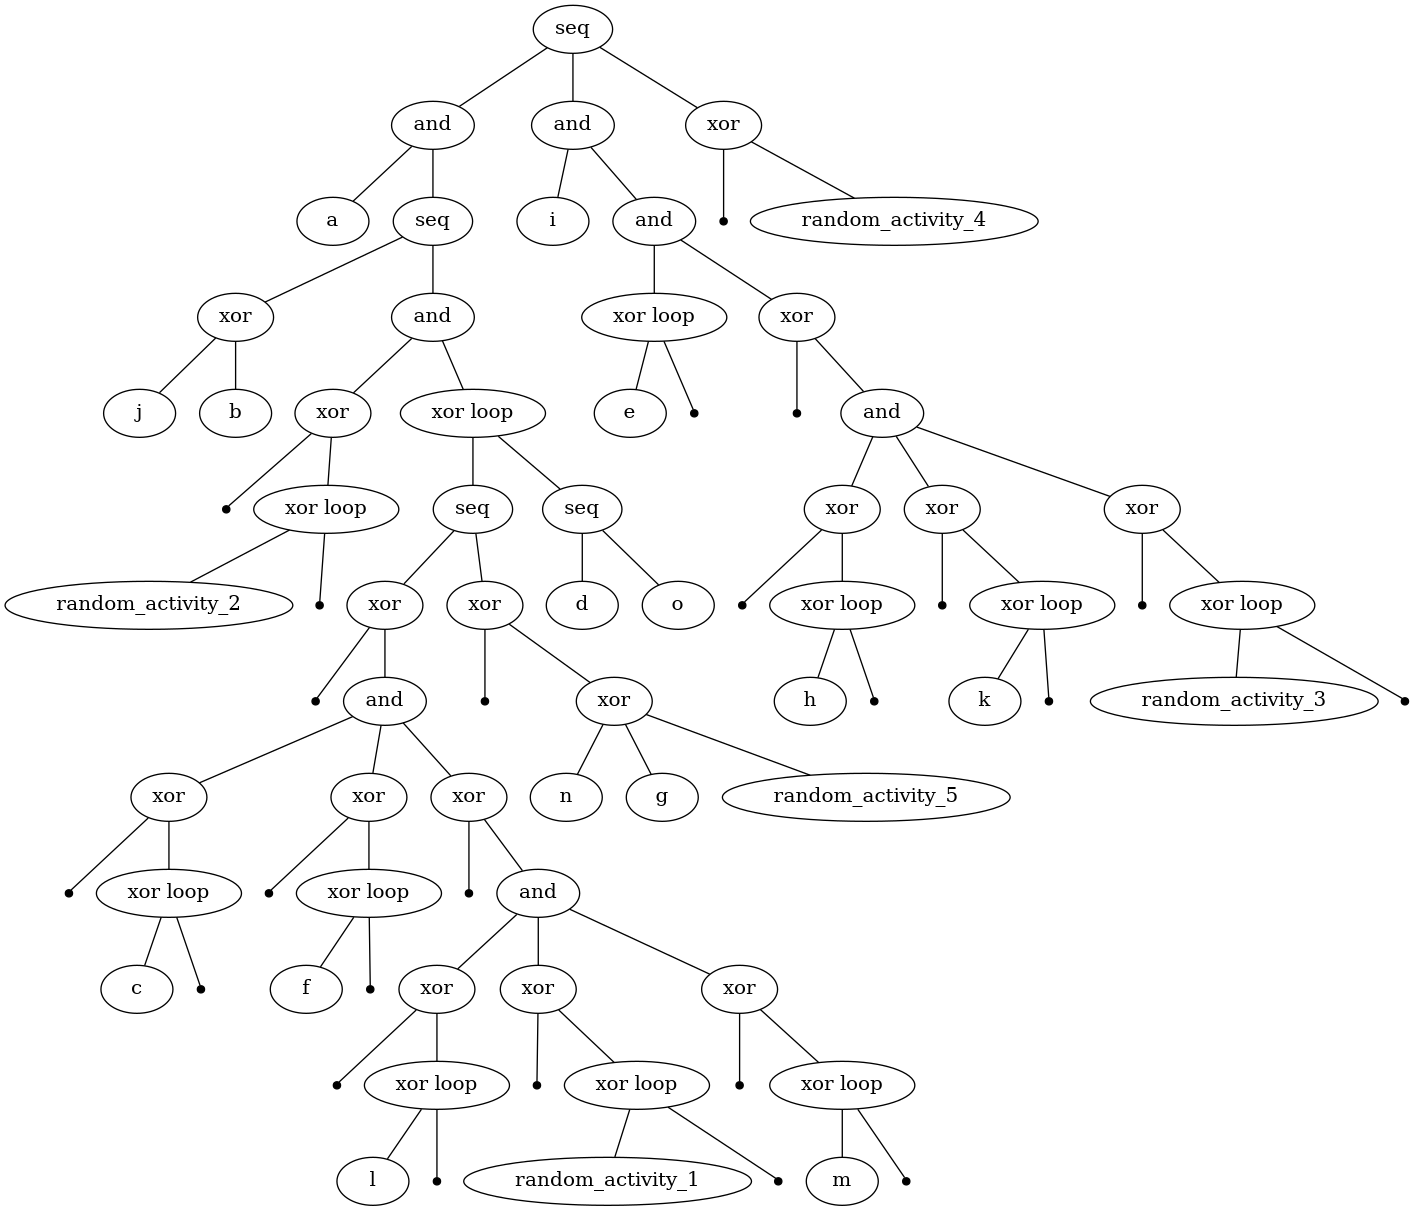

big/lo_0.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for lo_0
Eprover: # Proof found! # SZS status Unsatisfiable


In [92]:
log = pm4py.read_xes("Data/log_3_1732138120.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/lo_0.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/lo_0.p"))

Seq3(1]And2(2]a2_s, a, Seq2(3]Xor2(4]x2_s, j, b, x2_e[4), And2(4]a2_s, Loop(5]l_s, random_activity_2, tau[5), Loop(5]l_s, Seq2(6]And3(7]a3_s, Xor2(8]x2_s, tau, Loop(9]l_s, f, tau[9), x2_e[8), Loop(8]l_s, c, tau[8), Xor2(8]x2_s, tau, And3(9]a3_s, Loop(10]l_s, random_activity_1, tau[10), Loop(10]l_s, l, tau[10), Loop(10]l_s, m, tau[10), a3_e[9), x2_e[8), a3_e[7), Xor3(7]x3_s, g, n, random_activity_5, x3_e[7)[6), Seq2(6]d, o[6)[5), a2_e[4)[3), a2_e[2), Seq2(2]And3(3]a3_s, Loop(4]l_s, h, tau[4), Loop(4]l_s, random_activity_3, tau[4), Loop(4]l_s, k, tau[4), a3_e[3), Seq2(3]e, i[3)[2), Xor2(2]x2_s, tau, random_activity_4, x2_e[2)[1)
ini: a2_s
fin: x2_e

Wynik: 
ForAll((tau) => Exist(random_activity_1))
ForAll((x2_s) => ((Exist(tau) ^ ~(Exist(random_activity_4))) | (~(Exist(tau)) ^ Exist(random_activity_4))))
ForAll(~((j) ^ (x2_e)))
ForAll(((tau) | (random_activity_4)) => Exist(x2_e))
ForAll(~((x2_s) ^ (b)))
ForAll((l_s | l) => Exist(a3_e))
ForAll(~((b) ^ (x2_e)))
ForAll((l_s) => Exist(k))
Ex

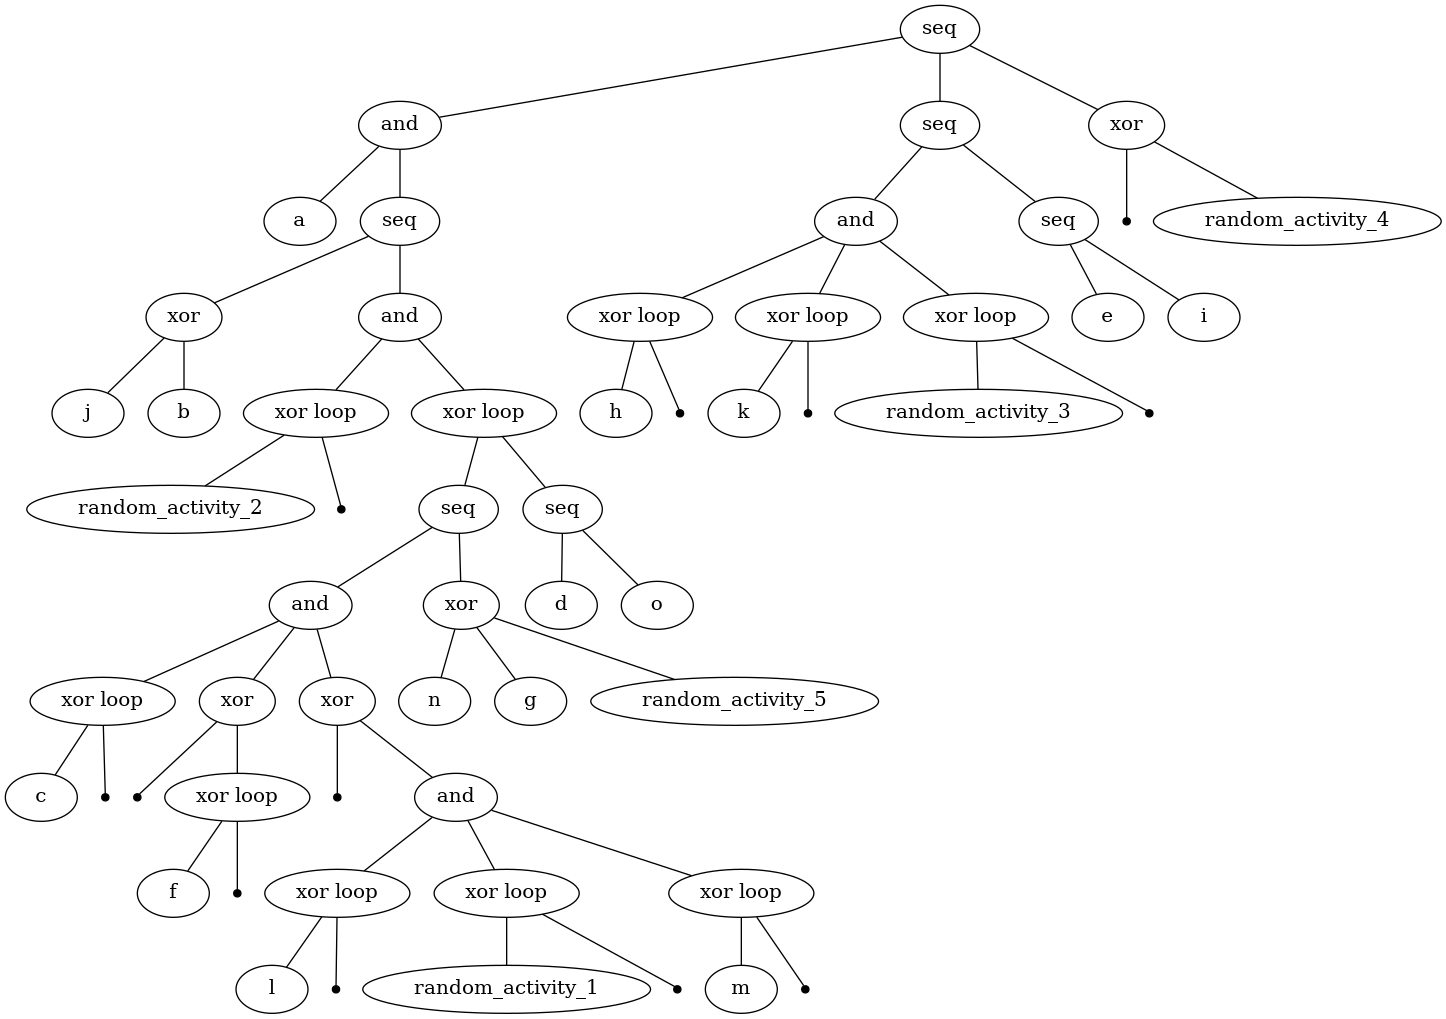

big/lo_50.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for lo_50
Eprover: # Proof found! # SZS status Unsatisfiable


In [93]:
process_tree = pm4py.discover_process_tree_inductive(
    log, 0.5, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "big/lo_50.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("big/lo_50.p"))

In [94]:
create_thesis_with_2_spec('big/lo_0.p', 'big/lo_50.p', 'big/lo_im.p', LogicFunctions.IMPLIES)
print_provers(use_provers("big/lo_im.p"))

big/lo_im.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status ContradictoryAxioms for lo_im
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [95]:
create_thesis_with_2_spec('big/lo_0.p', 'big/lo_50.p', 'big/lo_eq.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("big/lo_eq.p"))

big/lo_eq.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status ContradictoryAxioms for lo_eq
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [ ]:
with open('big/lo_50.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: (h(X) & ~k(X))
)).
'''
with open('big/lo_25_1.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/lo_25_1.p"))

big/lo_25_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for lo_25_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [99]:
with open('big/lo_50.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: ~(n(X) & g(X))
)).
'''
with open('big/lo_25_2.p', 'w') as f:
    f.write(text)

print_provers(use_provers("big/lo_25_2.p"))

big/lo_25_2.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for lo_25_2
Eprover: # Proof found! # SZS status ContradictoryAxioms


# Doubts

## Equivalence
- Tree is contradictory to itself for unsatisfiable tree
- Tree is countersatisfiable with itself for satisfiable tree

Seq5(1]register, analyze_defect, And2(2]a2_s, Xor2(3]x2_s, tau, inform_user, x2_e[3), And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, repair_complex, tau[5), x2_e[4), Loop(4]l_s, Seq2(5]Xor2(6]x2_s, tau, repair_simple, x2_e[6), test_repair[5), restart_repair[4), a2_e[3), a2_e[2), archive_repair, end[1)
ini: register
fin: end

Wynik: 
ForAll((x2_s | x2_e) => Exist(test_repair))
ForAll(~((l_s) ^ (restart_repair)))
ForAll(~((analyze_defect) ^ (a2_s | a2_e)))
ForAll((restart_repair) => Exist(x2_s | test_repair))
ForAll(~((x2_s) ^ (repair_simple)))
ForAll((register) => Exist(analyze_defect))
ForAll(~((l_s | repair_complex) ^ (x2_e)))
ForAll(~((l_s) ^ (repair_complex)))
ForAll(~((x2_s) ^ (inform_user)))
ForAll(~((tau) ^ (inform_user)))
Exist(x2_s)
ForAll(~((x2_s) ^ (l_s | repair_complex)))
ForAll(~((register) ^ (end)))
ForAll(~((tau) ^ (l_s | repair_complex)))
ForAll(~((x2_s) ^ (tau)))
ForAll((x2_s | test_repair) => ((Exist(restart_repair) ^ Exist(x2_s | test_repair)) | (~(Exist(restart_repair)))

/tmp/ipykernel_455392/2142833659.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/si

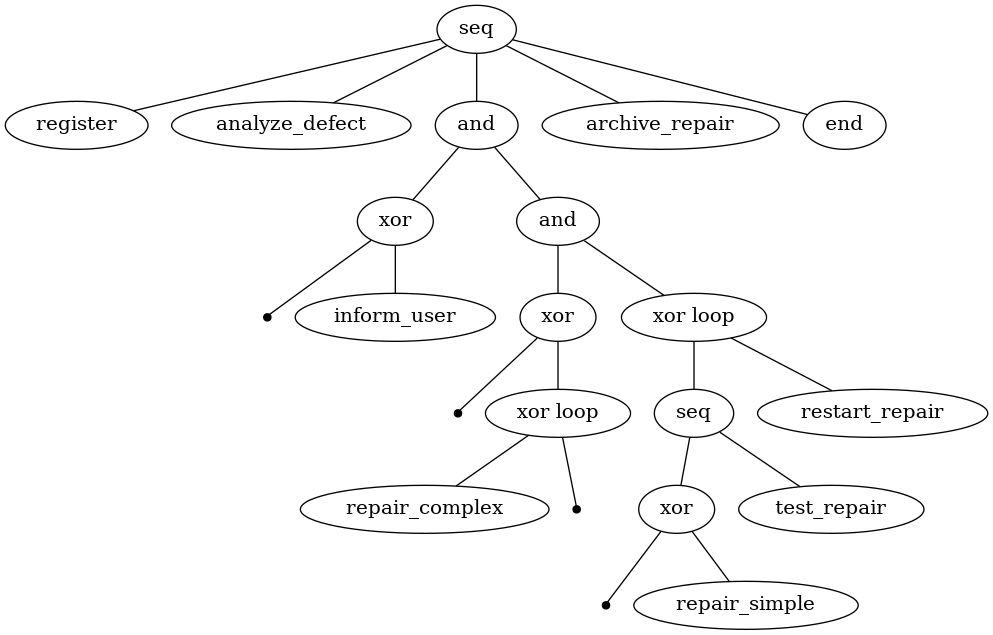

doubts/re_25.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for re_25
Eprover: # Proof found! # SZS status Unsatisfiable


In [80]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.25, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "doubts/re_25.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("doubts/re_25.p"))

Seq5(1]register, analyze_defect, And2(2]a2_s, inform_user, Seq2(3]Loop(4]l_s, Xor2(5]x2_s, repair_complex, repair_simple, x2_e[5), restart_repair[4), test_repair[3), a2_e[2), archive_repair, end[1)
ini: register
fin: end

Wynik: 
ForAll(((repair_complex) | (repair_simple)) => Exist(x2_e))
ForAll(~((l_s) ^ (restart_repair)))
ForAll(~(((inform_user) | (l_s | test_repair)) ^ (a2_e)))
ForAll(~((analyze_defect) ^ (a2_s | a2_e)))
ForAll(~((repair_complex) ^ (repair_simple)))
ForAll(~((x2_s) ^ (repair_simple)))
ForAll(~((l_s) ^ (x2_s | x2_e)))
ForAll((register) => Exist(analyze_defect))
ForAll(~((register) ^ (end)))
Exist(x2_s)
ForAll((x2_s | x2_e) => ((Exist(restart_repair) ^ Exist(x2_s | x2_e)) | (~(Exist(restart_repair)))))
ForAll((a2_s | a2_e) => Exist(archive_repair))
ForAll(~((x2_s) ^ (x2_e)))
ForAll(~((x2_s | x2_e) ^ (restart_repair)))
ForAll((analyze_defect) => Exist(a2_s | a2_e))
ForAll((a2_s) => (Exist(inform_user) ^ Exist(l_s | test_repair)))
ForAll((l_s | test_repair) => Exist(a2_

/tmp/ipykernel_455392/534677295.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/sit

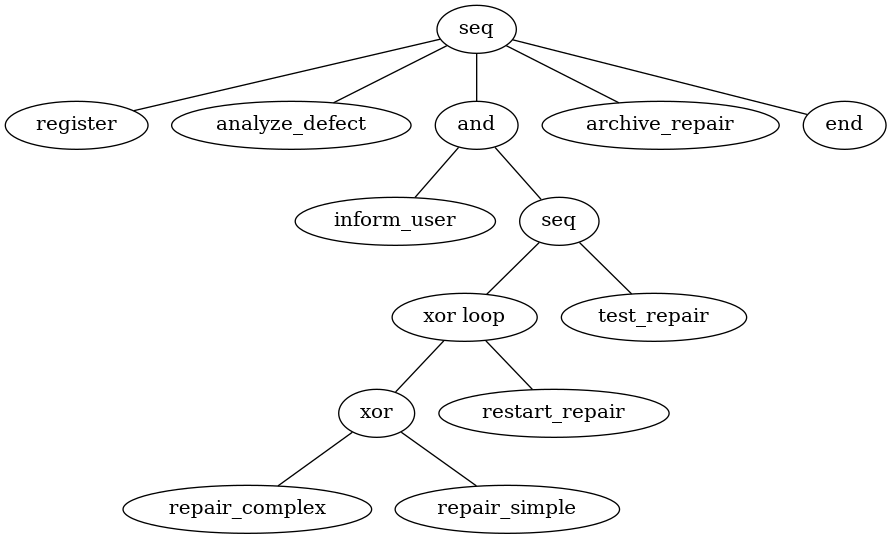

doubts/re_75.p
Vampire: % SZS status Satisfiable for re_75 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status Satisfiable


In [81]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.75, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "doubts/re_75.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("doubts/re_75.p"))

In [82]:
create_thesis_with_2_spec('doubts/re_25.p','doubts/re_75.p', 'doubts/re_25-75.p', LogicFunctions.IMPLIES)
print_provers(use_provers("doubts/re_25-75.p"))

doubts/re_25-75.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for re_25-75
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [83]:
create_thesis_with_2_spec('doubts/re_75.p','doubts/re_75.p', 'doubts/re_75-75.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("doubts/re_75-75.p"))

doubts/re_75-75.p
Vampire: % SZS status CounterSatisfiable for re_75-75 % # SZS output start Saturation.
Eprover: # No proof found! # SZS status CounterSatisfiable


In [84]:
create_thesis_with_2_spec('doubts/re_25.p','doubts/re_25.p', 'doubts/re_25-25.p', LogicFunctions.EQUIVALENT)
print_provers(use_provers("doubts/re_25-25.p"))

doubts/re_25-25.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for re_25-25
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Unsatisfiable trees
- What does it even mean that tree is unsatisfiable?
- It's almost impossible for big logs to create satisfiable trees
- There is no purpose to create thesis for unsatisfiable trees

parsing log, completed traces :: 100%|██████████| 100000/100000 [00:13<00:00, 7292.48it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=T

Seq2(1]Loop(2]l_s, new, tau[2), Xor2(2]x2_s, tau, And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, delete, tau[5), x2_e[4), Xor2(4]x2_s, tau, Seq2(5]And2(6]a2_s, Xor2(7]x2_s, tau, Loop(8]l_s, billed, tau[8), x2_e[7), Xor2(7]x2_s, tau, Seq2(8]Loop(9]l_s, Xor3(10]x3_s, Seq2(11]Xor2(12]x2_s, tau, Xor2(13]x2_s, set_status, join_pat, x2_e[13), x2_e[12), Xor2(12]x2_s, tau, And2(13]a2_s, Xor2(14]x2_s, tau, Loop(15]l_s, code_error, tau[15), x2_e[14), Seq3(14]Xor2(15]x2_s, tau, Loop(16]l_s, release, tau[16), x2_e[15), Xor2(15]x2_s, tau, Xor2(16]x2_s, code_ok, manual, x2_e[16), x2_e[15), Xor2(15]x2_s, tau, And2(16]a2_s, Xor2(17]x2_s, tau, Loop(18]l_s, code_nok, tau[18), x2_e[17), Xor2(17]x2_s, tau, Seq2(18]Xor2(19]x2_s, tau, And2(20]a2_s, Xor2(21]x2_s, tau, Loop(22]l_s, storno, tau[22), x2_e[21), Xor2(21]x2_s, tau, Loop(22]l_s, reject, tau[22), x2_e[21), a2_e[20), x2_e[19), Xor2(19]x2_s, tau, And2(20]a2_s, Xor2(21]x2_s, tau, Loop(22]l_s, reopen, tau[22), x2_e[21), Xor2(21]x2_s, tau, fin, x2_e[21), a2_

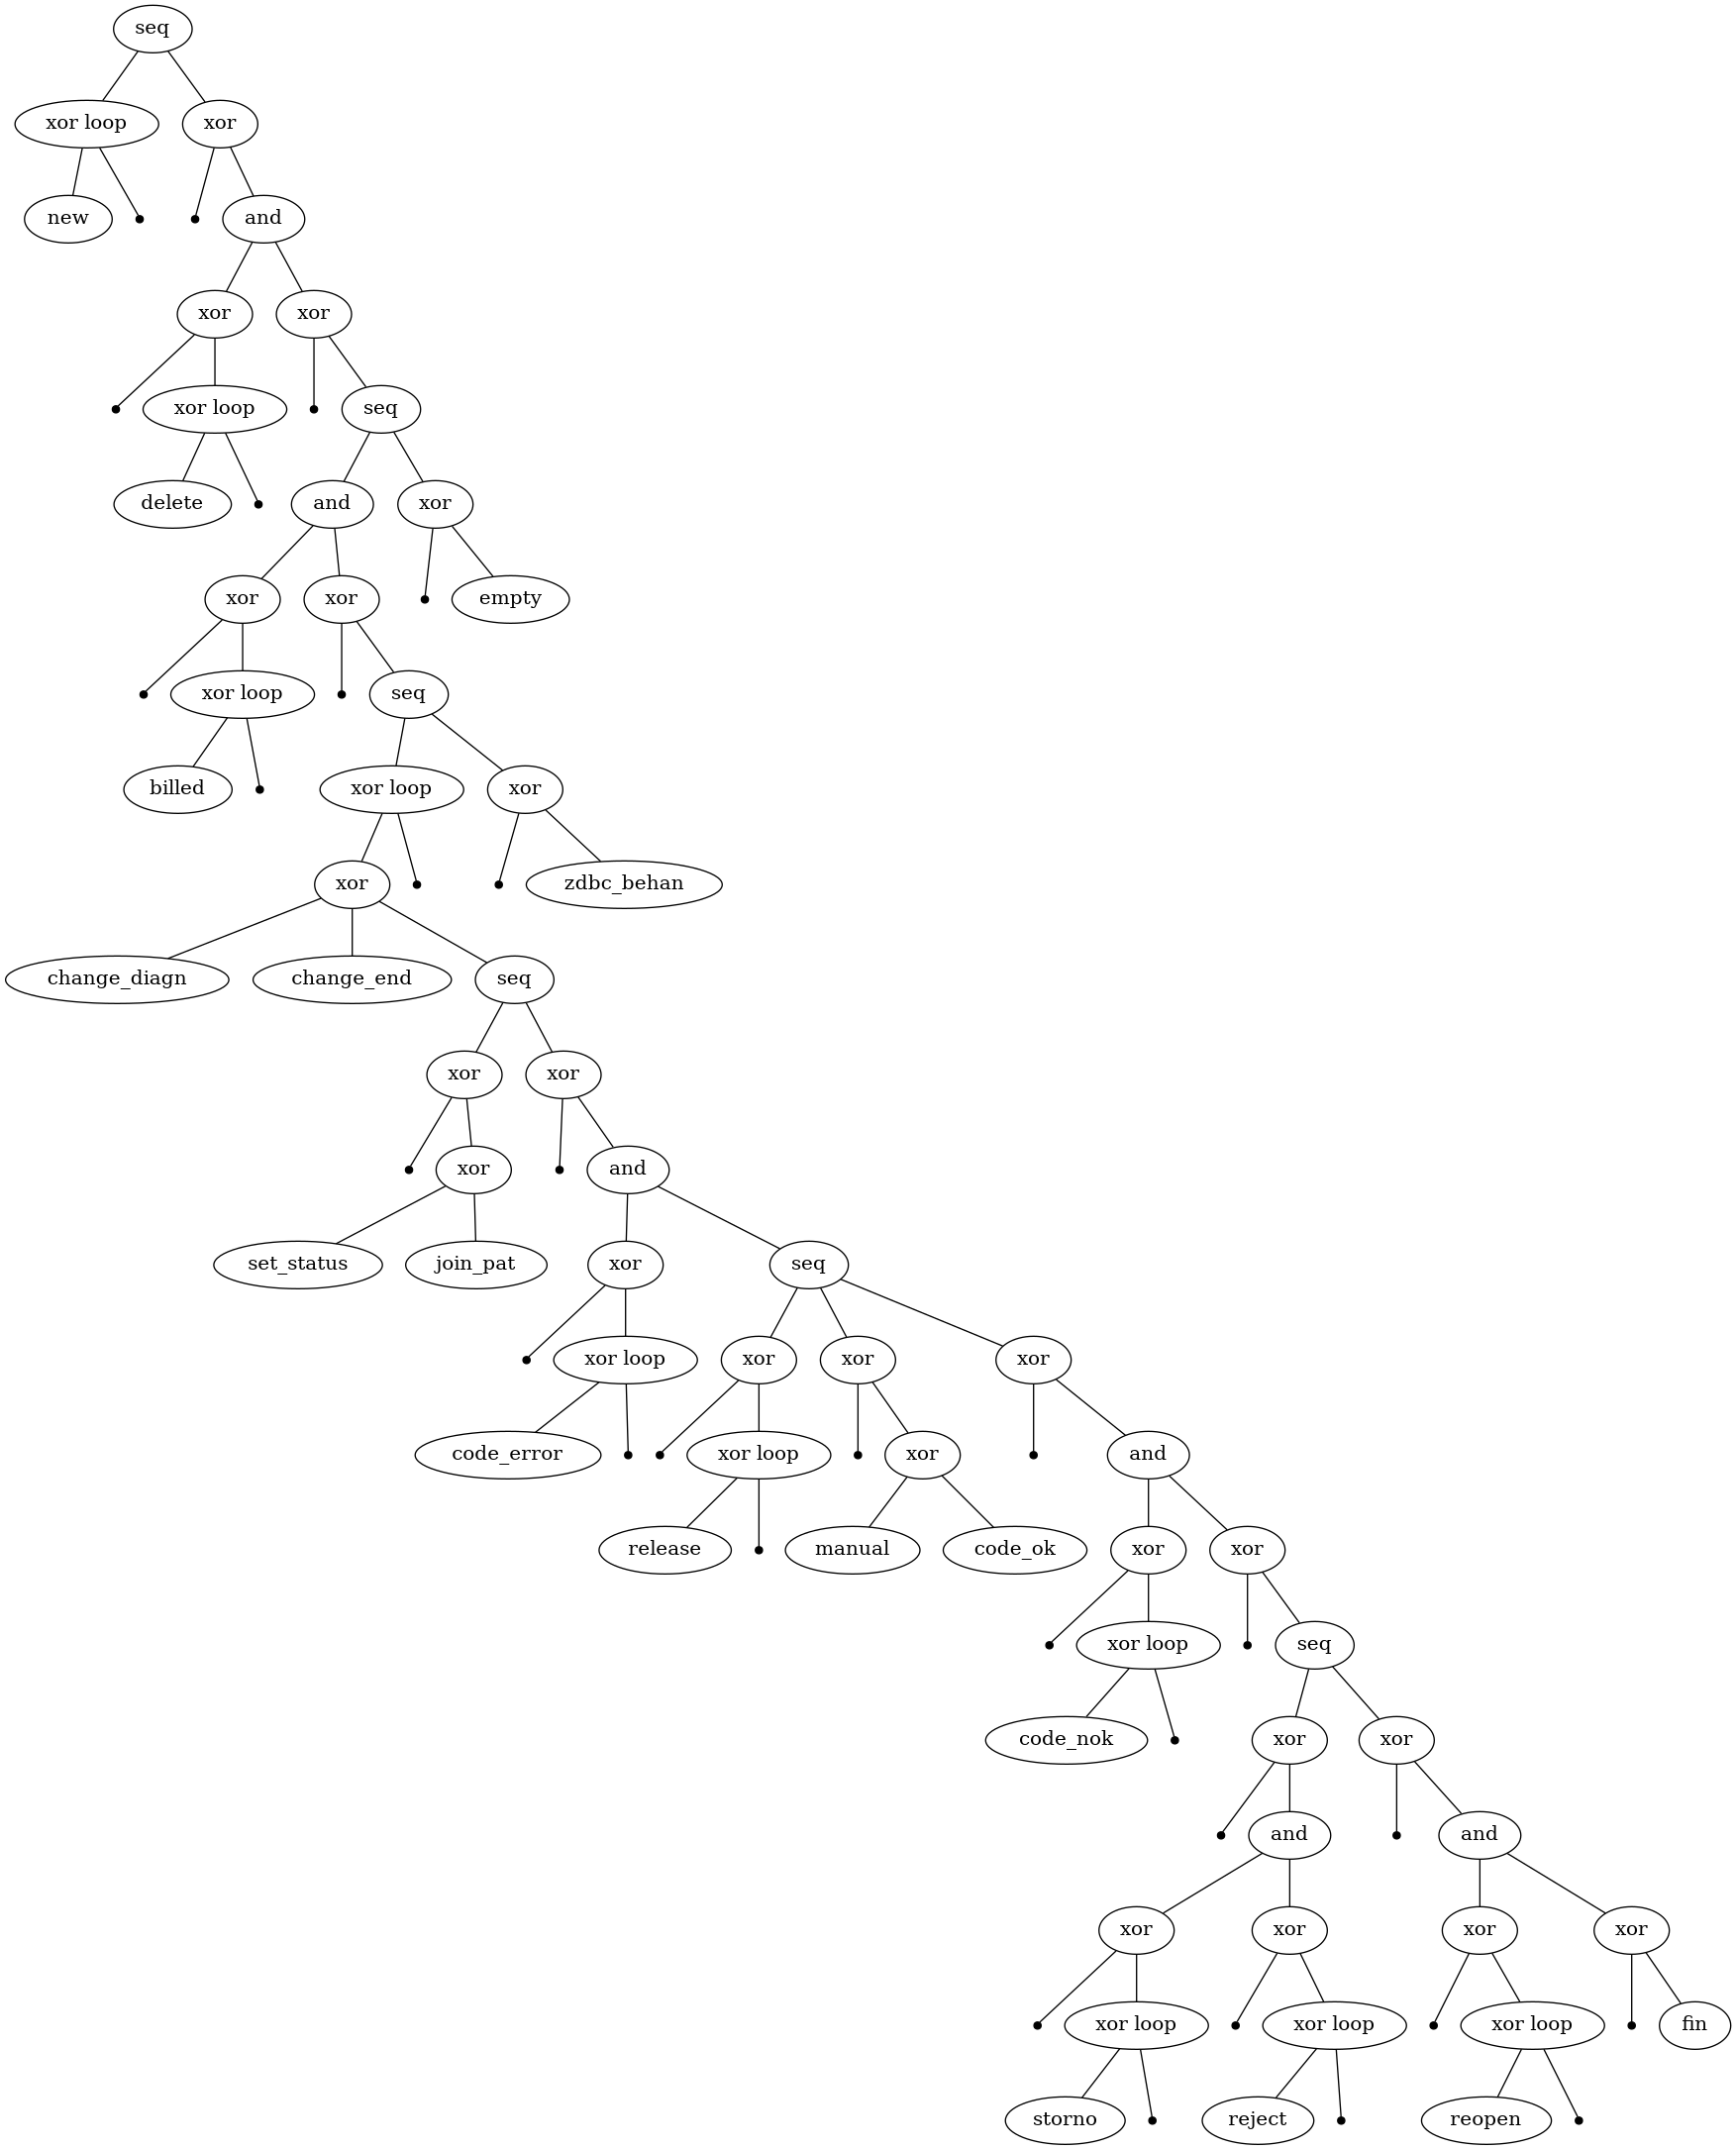

doubts/hb_0.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for hb_0
Eprover: # Proof found! # SZS status Unsatisfiable


In [85]:
log = pm4py.read_xes("Data/Hospital Billing - Event Log.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "doubts/hb_0.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("doubts/hb_0.p"))

Seq2(1]Loop(2]l_s, new, tau[2), Xor2(2]x2_s, Seq2(3]Seq2(4]And2(5]a2_s, Loop(6]l_s, billed, tau[6), Seq2(6]Xor2(7]x2_s, Loop(8]l_s, set_status, tau[8), Seq3(8]Xor2(9]x2_s, Seq2(10]Xor2(11]x2_s, tau, Xor3(12]x3_s, Seq2(13]Seq2(14]Xor2(15]x2_s, tau, Loop(16]l_s, code_error, tau[16), x2_e[15), And2(15]a2_s, Loop(16]l_s, storno, tau[16), And2(16]a2_s, Loop(17]l_s, code_nok, tau[17), Loop(17]l_s, reject, tau[17), a2_e[16), a2_e[15)[14), Xor2(14]x2_s, tau, Loop(15]l_s, reopen, tau[15), x2_e[14)[13), Loop(13]l_s, change_end, tau[13), Loop(13]l_s, change_diagn, tau[13), x3_e[12), x2_e[11), Loop(11]l_s, fin, tau[11)[10), Loop(10]l_s, manual, tau[10), x2_e[9), Loop(9]l_s, release, tau[9), Loop(9]l_s, code_ok, tau[9)[8), x2_e[7), Xor2(7]x2_s, tau, zdbc_behan, x2_e[7)[6), a2_e[5), Xor2(5]x2_s, tau, empty, x2_e[5)[4), Xor2(4]x2_s, tau, Loop(5]l_s, delete, tau[5), x2_e[4)[3), Loop(3]l_s, join_pat, tau[3), x2_e[2)[1)
ini: l_s
fin: x2_e

Wynik: 
ForAll(~((empty) ^ (x2_e)))
ForAll(~((reopen) ^ (tau)))


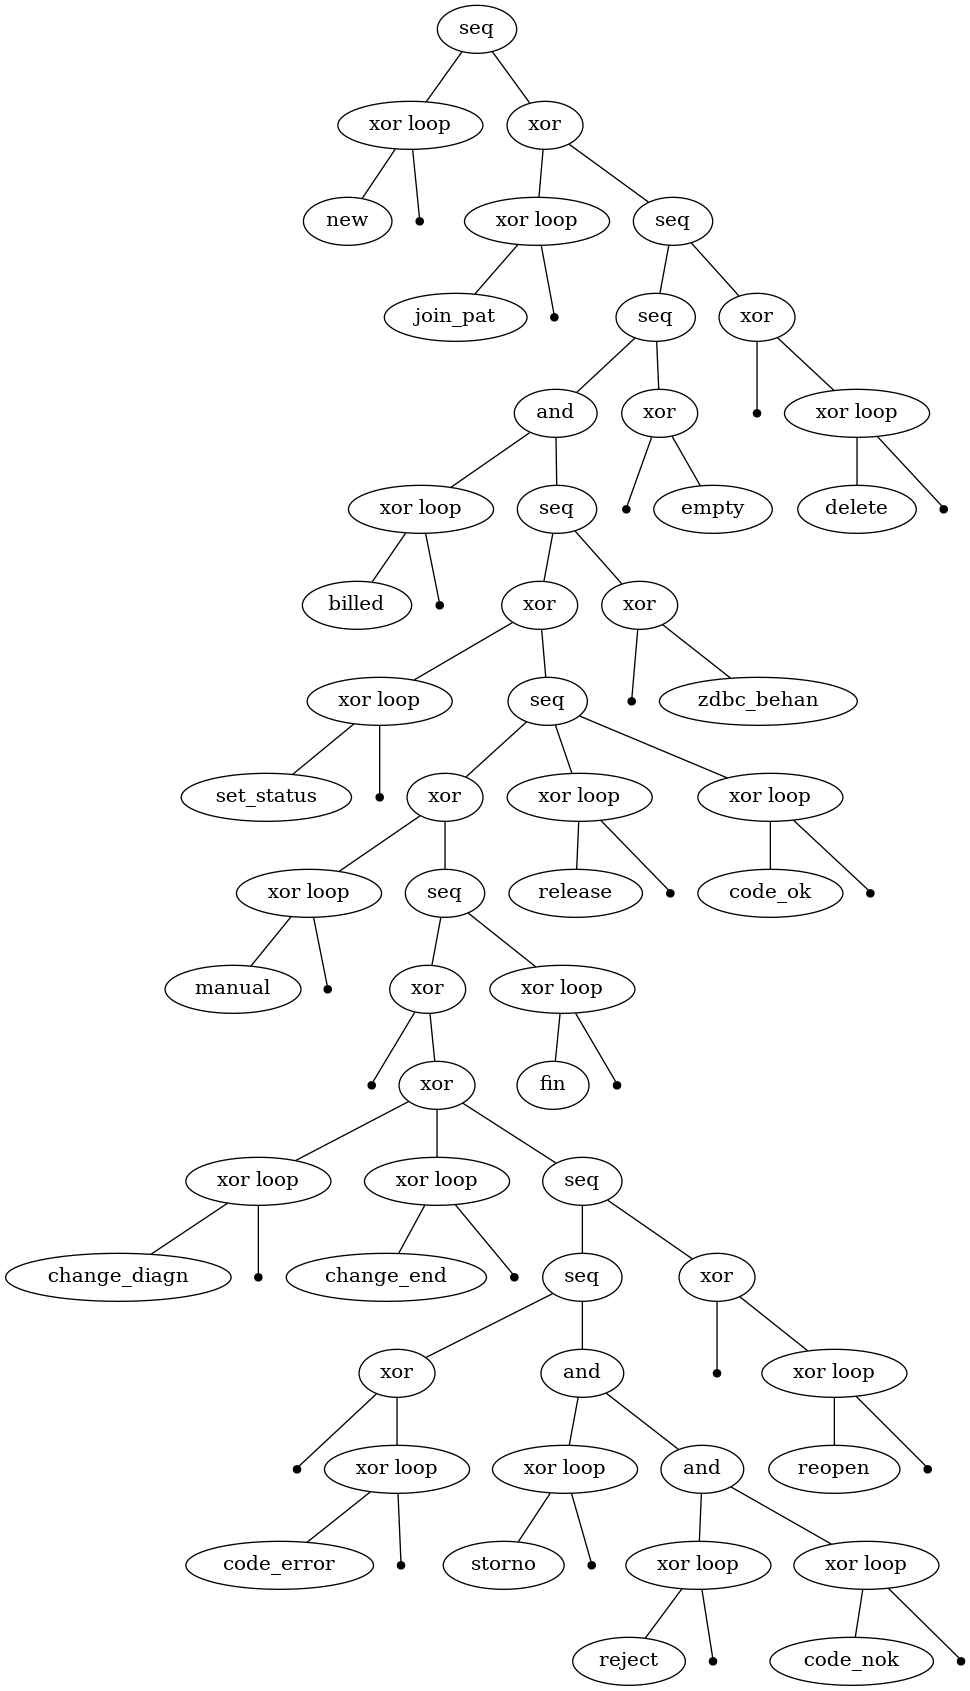

doubts/hb_25.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Unsatisfiable for hb_25
Eprover: # Proof found! # SZS status Unsatisfiable


In [86]:
process_tree = pm4py.discover_process_tree_inductive(
    log, 0.25, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
tree_to_tptp(process_tree, "doubts/hb_25.p", rule_prefix="A")
pm4py.view_process_tree(process_tree)
print_provers(use_provers("doubts/hb_25.p"))

In [87]:
with open('doubts/hb_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ?[X]: new(X) => ?[Y]: join_pat(Y)
)).
'''
with open('doubts/hb_25_1.p', 'w') as f:
    f.write(text)

print_provers(use_provers("doubts/hb_25_1.p"))

doubts/hb_25_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_25_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


In [88]:
with open('doubts/hb_25.p', 'r') as f:
    text = f.read()
text += '\n\n' + '''
fof(thesis, conjecture, (
    ![X]: new(X) => ?[Y]: join_pat(Y)
)).
'''
with open('doubts/hb_25_1.p', 'w') as f:
    f.write(text)

print_provers(use_provers("doubts/hb_25_1.p"))

doubts/hb_25_1.p
Vampire: % Refutation found. Thanks to Tanya! % SZS status Theorem for hb_25_1
Eprover: # Proof found! # SZS status ContradictoryAxioms


## Unknown patterns
- In attempt to create satisfiable tree we increase noise thresholding to max
- There is high possibility for apperance of unknown pattern like XOR12 for high thresholding
- Why is there so much $tau$? (black dots)

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:05<00:00, 2281.74it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=Tru

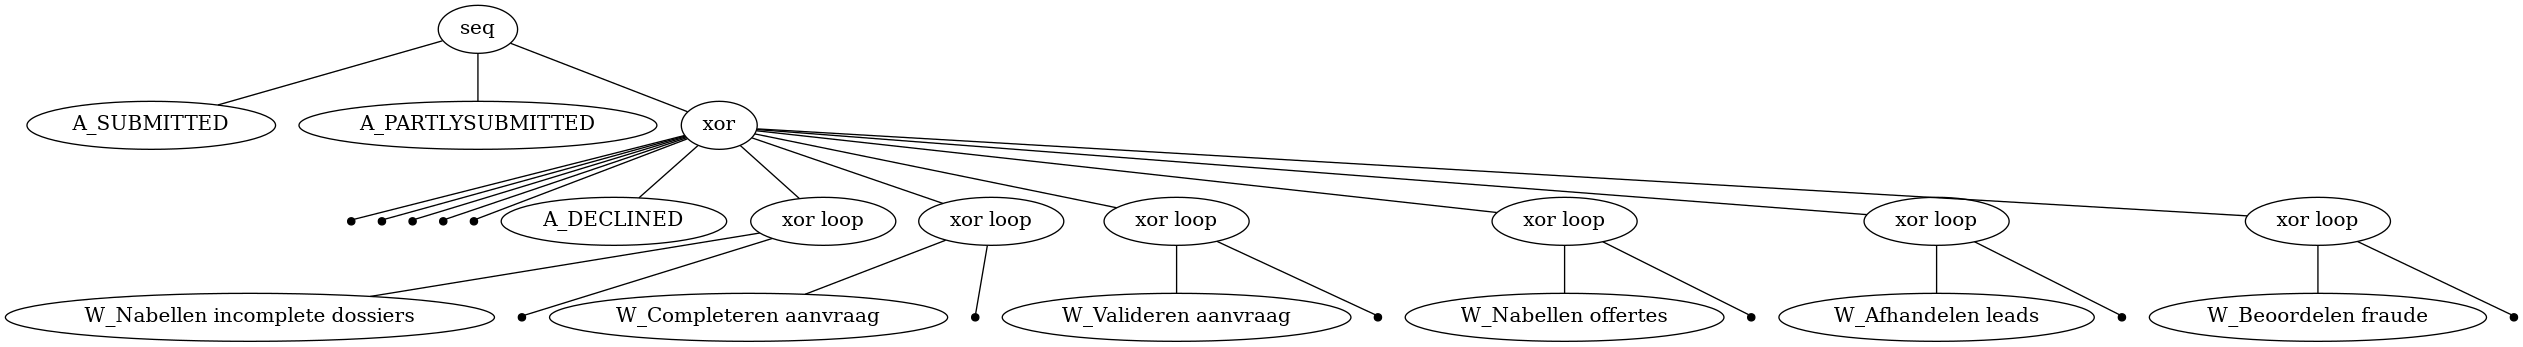

In [89]:
log = pm4py.read_xes('Data/bpic2012.xes')

process_tree = pm4py.discover_process_tree_inductive(
    log, 1.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

pm4py.view_process_tree(process_tree)

# Provers

## Run all

In [90]:
folder = 'our_problems'

res = []

problem_files = sorted([f for f in os.listdir(folder) if f.endswith('.p')])
for problem_file in problem_files:
    res.append(use_provers(os.path.join(folder, problem_file)))

for r in res:
    provers_to_csv(r)

print("\n\n\n")

for r in res:
    print_provers(r)
    print()

our_problems/problem_1.p,% SZS status Satisfiable for problem_1 % # SZS output start Saturation.,# No proof found! # SZS status Satisfiable
our_problems/problem_10.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_10,# Proof found! # SZS status ContradictoryAxioms
our_problems/problem_11.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_11,# Proof found! # SZS status Theorem
our_problems/problem_12.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_12,# Proof found! # SZS status Theorem
our_problems/problem_13.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_13,# Proof found! # SZS status Theorem
our_problems/problem_14.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_14,# Proof found! # SZS status Theorem
our_problems/problem_15.p,% Refutation found. Thanks to Tanya! % SZS status Theorem for problem_15,# Proof found! # SZS status ContradictoryAxioms
our_problems/problem_16.p,

## Run one

In [91]:
print_provers(use_provers('problems/problem_4.p', verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Unsatisfiable for problem_4
% SZS output start Proof for problem_4
15. ! [X1] : ~((repair_complex(X1) | l_s(X1)) & (repair_simple(X1) | l_s(X1))) [input]
41. ? [X1] : l_s(X1) [input]
64. ! [X0] : ~((repair_complex(X0) | l_s(X0)) & (repair_simple(X0) | l_s(X0))) [rectify 15]
83. ? [X0] : l_s(X0) [rectify 41]
105. ! [X0] : ((~repair_complex(X0) & ~l_s(X0)) | (~repair_simple(X0) & ~l_s(X0))) [ennf transformation 64]
188. ? [X0] : l_s(X0) => l_s(sK24) [choice axiom]
189. l_s(sK24) [skolemisation 83,188]
237. ~l_s(X0) | ~l_s(X0) [cnf transformation 105]
284. l_s(sK24) [cnf transformation 189]
301. ~l_s(X0) [duplicate literal removal 237]
324. 6 <=> ! [X0] : ~l_s(X0) [avatar definition]
325. ~l_s(X0) <- (6) [avatar component clause 324]
405. 6 [avatar split clause 301,324]
515. $false <- (6) [resolution 325,284]
516. ~6 [avatar contradiction clause 515]
517. $false [avatar sat refutatio